# Train ADAGE models on RNAseq data

### Georgia Doing 2021

This notebook walks through the training of an RNAseq-based ADAGE model as a continuation of analyses from last year (2021_06_eADAGE_adapt/seqADAGE).

Since then we have downloaded a new compendium of RNAseq data and aligned it to the PAO1 and PA14 reference genomes using prokarytoic-optimized parameters.
(https://github.com/hoganlab-dartmouth/pa-seq-compendia)

The main objectives are to train models, take a first look and save the models for further analysis on forthcoming notebooks
1. Load compendia
2. Train and save models
3. Visualize first-look plots

In [1]:
import run_count_autoencoder
import run_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imp import reload
import Adage
from scipy.stats import hypergeom
import csv
import TiedWeightsEncoder

In [30]:
# for dev purposes, while updating run_model.py need to reload
reload(run_count_autoencoder)
reload(run_model)
reload(Adage)
reload(TiedWeightsEncoder)

<module 'TiedWeightsEncoder' from '/home/georgia/Dropbox (Hogan Lab)/Digital_notebook/2021_04_23_seqADAGE/seqADAGE/Py/TiedWeightsEncoder.py'>

In [2]:
m = run_count_autoencoder.run_count_autoencoder('../data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log.csv',lr=.0001,seed=460,kl1=1e-10,kl2=1e-1, act = 'sigmoid', tied = True, epochs=5, init='glorot_uniform', batch_size=10, v=0)
tf_adage = Adage.Adage(m.autoencoder, m.history, m.compendium)
tf_weights = np.array(pd.read_csv('../outputs/ADAGE_OG_weights.csv', header = None))
tf_cost = pd.read_csv('../outputs/ADAGE_OG_cost_log.csv')
tf_adage.weights = tf_weights
tf_adage.loss = tf_cost['cost']
tf_adage.set_hwg_cutoff(2.5).shape

(5549, 600)

In [ ]:
LOAD MODELS FROM FILES

In [23]:
inits = ['glorot_uniform','glorot_normal']
L1_norm = [0, 1e-5, 1e-10] # 
L2_norm = [0, 1e-5, 1e-10]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

model_dict_da = {
    "tf_adage": tf_adage
}
model_dict_dca = {
    "tf_adage": tf_adage
}
model_dict_dca01 = {
    "tf_adage": tf_adage
}
model_dict_arr = {
    "tf_adage": tf_adage
}
model_dict_floor = {
    "tf_adage": tf_adage
}



for w in tied:
    for i in inits:
        for l in L1_norm:
            for n in L2_norm:
                for a in act_fun:
                    for t in lr:
                        seed = str(560)
                        name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                        #model_dict_da
                        prefix = '/data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log_01_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:250_tied:' + str(w) + '_batch:10_lr:' + str(t)
                        try:
                            weights_temp = np.array(pd.read_csv('../outputs/weights/' + prefix + '_en_weights_da.csv', header = None))
                            loss_temp = np.array(pd.read_csv('../outputs/loss/' + prefix + '_loss_da.csv', header = None))
                            val_loss_temp = np.array(pd.read_csv('../outputs/val_loss/' + prefix + '_val_loss_da.csv', header = None))
                            adage_temp = Adage.Adage(tf_adage.autoencoder, tf_adage.history, tf_adage.compendium)
                            adage_temp.weights = weights_temp
                            adage_temp.loss = loss_temp[0]
                            adage_temp.val_loss = val_loss_temp[0]
                            adage_temp.set_hwg_cutoff(2.5)
                            model_dict_da[name] = adage_temp
                        except:
                            print(name)
                            adage_temp = tf_adage
                            adage_temp.loss = [0] * 250
                            adage_temp.val_loss = [0] * 250
                            adage_temp.weights = np.zeros(tf_adage.weights.shape)
                            model_dict_da[name] = adage_temp
                        
                        #model_dict_dca
                        prefix = '/data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log_01_bygene_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:250_tied:' + str(w) + '_batch:10_lr:' + str(t)
                        try:
                            weights_temp = np.array(pd.read_csv('../outputs/weights/' + prefix + '_en_weights_da.csv', header = None))
                            loss_temp = np.array(pd.read_csv('../outputs/loss/' + prefix + '_loss_da.csv', header = None))
                            val_loss_temp = np.array(pd.read_csv('../outputs/val_loss/' + prefix + '_val_loss_da.csv', header = None))
                            adage_temp = Adage.Adage(tf_adage.autoencoder, tf_adage.history, tf_adage.compendium)
                            adage_temp.weights = weights_temp
                            adage_temp.loss = loss_temp[0]
                            adage_temp.val_loss = val_loss_temp[0]
                            adage_temp.set_hwg_cutoff(2.5)
                            model_dict_dca[name] = adage_temp
                        except:
                            #print(name)
                            adage_temp = tf_adage
                            adage_temp.loss = [0] * 250
                            adage_temp.val_loss = [0] * 250
                            adage_temp.weights = np.zeros(tf_adage.weights.shape)
                            model_dict_dca[name] = adage_temp
                        
                        #model_dict_dca01
                        prefix = '/data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log_01_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:50_tied:' + str(w) + '_batch:10_lr:' + str(t)
                        try:
                            weights_temp = np.array(pd.read_csv('../outputs/weights/' + prefix + '_en_weights_dca.csv', header = None))
                            loss_temp = np.array(pd.read_csv('../outputs/loss/' + prefix + '_loss_dca.csv', header = None))
                            val_loss_temp = np.array(pd.read_csv('../outputs/val_loss/' + prefix + '_val_loss_dca.csv', header = None))
                            adage_temp = Adage.Adage(tf_adage.autoencoder, tf_adage.history, tf_adage.compendium)
                            adage_temp.weights = weights_temp
                            adage_temp.loss = loss_temp[0]
                            adage_temp.val_loss = val_loss_temp[0]
                            adage_temp.set_hwg_cutoff(2.5)
                            model_dict_dca01[name] = adage_temp
                        except:
                            #print(name)
                            adage_temp = tf_adage
                            adage_temp.loss = [0] * 50
                            adage_temp.val_loss = [0] * 50
                            adage_temp.weights = np.zeros(tf_adage.weights.shape)
                            model_dict_dca01[name] = adage_temp
                            
                        #model_dict_arr
                        prefix = '/data_files/train_set_normalized_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:50_tied:' + str(w) + '_batch:10_lr:' + str(t)
                        try:
                            weights_temp = np.array(pd.read_csv('../outputs/weights/' + prefix + '_en_weights_da.csv', header = None))
                            loss_temp = np.array(pd.read_csv('../outputs/loss/' + prefix + '_loss_da.csv', header = None))
                            val_loss_temp = np.array(pd.read_csv('../outputs/val_loss/' + prefix + '_val_loss_da.csv', header = None))
                            adage_temp = Adage.Adage(tf_adage.autoencoder, tf_adage.history, tf_adage.compendium)
                            adage_temp.weights = weights_temp
                            adage_temp.loss = loss_temp[0]
                            adage_temp.val_loss = val_loss_temp[0]
                            adage_temp.set_hwg_cutoff(2.5)
                            model_dict_arr[name] = adage_temp
                        except:
                            #print(name)
                            adage_temp = tf_adage
                            adage_temp.loss = [0] * 50
                            adage_temp.val_loss = [0] * 50
                            adage_temp.weights = np.zeros(tf_adage.weights.shape)
                            model_dict_arr[name] = adage_temp
                            
                        # model_dict_floor
                        prefix = '/data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_floor_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:50_tied:' + str(w) + '_batch:10_lr:' + str(t)
                        try:
                            weights_temp = np.array(pd.read_csv('../outputs/weights/' + prefix + '_en_weights_dca.csv', header = None))
                            loss_temp = np.array(pd.read_csv('../outputs/loss/' + prefix + '_loss_dca.csv', header = None))
                            val_loss_temp = np.array(pd.read_csv('../outputs/val_loss/' + prefix + '_val_loss_dca.csv', header = None))
                            adage_temp = Adage.Adage(tf_adage.autoencoder, tf_adage.history, tf_adage.compendium)
                            adage_temp.weights = weights_temp
                            adage_temp.loss = loss_temp[0]
                            adage_temp.val_loss = val_loss_temp[0]
                            adage_temp.set_hwg_cutoff(2.5)
                            model_dict_floor[name] = adage_temp
                        except:
                            #print(name)
                            adage_temp = tf_adage
                            adage_temp.loss = [0] * 50
                            adage_temp.val_loss = [0] * 50
                            adage_temp.weights = np.zeros(tf_adage.weights.shape)
                            model_dict_floor[name] = adage_temp




ad_glorot_uniform_0_0_sigmoid_tied_True__lr1.5
ad_glorot_uniform_0_0_sigmoid_tied_True__lr1.0
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.5
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.1
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.01
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.001
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.0001
ad_glorot_uniform_0_0_tanh_tied_True__lr1.5
ad_glorot_uniform_0_0_tanh_tied_True__lr1.0
ad_glorot_uniform_0_0_tanh_tied_True__lr0.5
ad_glorot_uniform_0_0_tanh_tied_True__lr0.1
ad_glorot_uniform_0_0_tanh_tied_True__lr0.01
ad_glorot_uniform_0_0_tanh_tied_True__lr0.001
ad_glorot_uniform_0_0_tanh_tied_True__lr0.0001
ad_glorot_uniform_0_0_relu_tied_True__lr1.5
ad_glorot_uniform_0_0_relu_tied_True__lr1.0
ad_glorot_uniform_0_0_relu_tied_True__lr0.5
ad_glorot_uniform_0_0_relu_tied_True__lr0.1
ad_glorot_uniform_0_0_relu_tied_True__lr0.01
ad_glorot_uniform_0_0_relu_tied_True__lr0.001
ad_glorot_uniform_0_0_relu_tied_True__lr0.0001
ad_glorot_uniform_0_1e-05_sigmoid_tie

ad_glorot_uniform_1e-10_1e-10_sigmoid_tied_True__lr1.0
ad_glorot_uniform_1e-10_1e-10_sigmoid_tied_True__lr0.5
ad_glorot_uniform_1e-10_1e-10_sigmoid_tied_True__lr0.1
ad_glorot_uniform_1e-10_1e-10_sigmoid_tied_True__lr0.01
ad_glorot_uniform_1e-10_1e-10_sigmoid_tied_True__lr0.001
ad_glorot_uniform_1e-10_1e-10_sigmoid_tied_True__lr0.0001
ad_glorot_uniform_1e-10_1e-10_tanh_tied_True__lr1.5
ad_glorot_uniform_1e-10_1e-10_tanh_tied_True__lr1.0
ad_glorot_uniform_1e-10_1e-10_tanh_tied_True__lr0.5
ad_glorot_uniform_1e-10_1e-10_tanh_tied_True__lr0.1
ad_glorot_uniform_1e-10_1e-10_tanh_tied_True__lr0.01
ad_glorot_uniform_1e-10_1e-10_tanh_tied_True__lr0.001
ad_glorot_uniform_1e-10_1e-10_tanh_tied_True__lr0.0001
ad_glorot_uniform_1e-10_1e-10_relu_tied_True__lr1.5
ad_glorot_uniform_1e-10_1e-10_relu_tied_True__lr1.0
ad_glorot_uniform_1e-10_1e-10_relu_tied_True__lr0.5
ad_glorot_uniform_1e-10_1e-10_relu_tied_True__lr0.1
ad_glorot_uniform_1e-10_1e-10_relu_tied_True__lr0.01
ad_glorot_uniform_1e-10_1e-10_rel

ad_glorot_normal_1e-10_0_relu_tied_True__lr0.01
ad_glorot_normal_1e-10_0_relu_tied_True__lr0.001
ad_glorot_normal_1e-10_0_relu_tied_True__lr0.0001
ad_glorot_normal_1e-10_1e-05_sigmoid_tied_True__lr1.5
ad_glorot_normal_1e-10_1e-05_sigmoid_tied_True__lr1.0
ad_glorot_normal_1e-10_1e-05_sigmoid_tied_True__lr0.5
ad_glorot_normal_1e-10_1e-05_sigmoid_tied_True__lr0.1
ad_glorot_normal_1e-10_1e-05_sigmoid_tied_True__lr0.01
ad_glorot_normal_1e-10_1e-05_sigmoid_tied_True__lr0.001
ad_glorot_normal_1e-10_1e-05_sigmoid_tied_True__lr0.0001
ad_glorot_normal_1e-10_1e-05_tanh_tied_True__lr1.5
ad_glorot_normal_1e-10_1e-05_tanh_tied_True__lr1.0
ad_glorot_normal_1e-10_1e-05_tanh_tied_True__lr0.5
ad_glorot_normal_1e-10_1e-05_tanh_tied_True__lr0.1
ad_glorot_normal_1e-10_1e-05_tanh_tied_True__lr0.01
ad_glorot_normal_1e-10_1e-05_tanh_tied_True__lr0.001
ad_glorot_normal_1e-10_1e-05_tanh_tied_True__lr0.0001
ad_glorot_normal_1e-10_1e-05_relu_tied_True__lr1.5
ad_glorot_normal_1e-10_1e-05_relu_tied_True__lr1.0
ad_g

ad_glorot_uniform_1e-05_1e-10_tanh_tied_False__lr0.001
ad_glorot_uniform_1e-05_1e-10_tanh_tied_False__lr0.0001
ad_glorot_uniform_1e-05_1e-10_relu_tied_False__lr1.5
ad_glorot_uniform_1e-05_1e-10_relu_tied_False__lr1.0
ad_glorot_uniform_1e-05_1e-10_relu_tied_False__lr0.5
ad_glorot_uniform_1e-05_1e-10_relu_tied_False__lr0.1
ad_glorot_uniform_1e-05_1e-10_relu_tied_False__lr0.01
ad_glorot_uniform_1e-05_1e-10_relu_tied_False__lr0.001
ad_glorot_uniform_1e-05_1e-10_relu_tied_False__lr0.0001
ad_glorot_uniform_1e-10_0_sigmoid_tied_False__lr1.5
ad_glorot_uniform_1e-10_0_sigmoid_tied_False__lr1.0
ad_glorot_uniform_1e-10_0_sigmoid_tied_False__lr0.5
ad_glorot_uniform_1e-10_0_sigmoid_tied_False__lr0.1
ad_glorot_uniform_1e-10_0_sigmoid_tied_False__lr0.01
ad_glorot_uniform_1e-10_0_sigmoid_tied_False__lr0.001
ad_glorot_uniform_1e-10_0_sigmoid_tied_False__lr0.0001
ad_glorot_uniform_1e-10_0_tanh_tied_False__lr1.5
ad_glorot_uniform_1e-10_0_tanh_tied_False__lr1.0
ad_glorot_uniform_1e-10_0_tanh_tied_False__l

ad_glorot_normal_1e-05_1e-05_sigmoid_tied_False__lr0.001
ad_glorot_normal_1e-05_1e-05_sigmoid_tied_False__lr0.0001
ad_glorot_normal_1e-05_1e-05_tanh_tied_False__lr1.5
ad_glorot_normal_1e-05_1e-05_tanh_tied_False__lr1.0
ad_glorot_normal_1e-05_1e-05_tanh_tied_False__lr0.5
ad_glorot_normal_1e-05_1e-05_tanh_tied_False__lr0.1
ad_glorot_normal_1e-05_1e-05_tanh_tied_False__lr0.01
ad_glorot_normal_1e-05_1e-05_tanh_tied_False__lr0.001
ad_glorot_normal_1e-05_1e-05_tanh_tied_False__lr0.0001
ad_glorot_normal_1e-05_1e-05_relu_tied_False__lr1.5
ad_glorot_normal_1e-05_1e-05_relu_tied_False__lr1.0
ad_glorot_normal_1e-05_1e-05_relu_tied_False__lr0.5
ad_glorot_normal_1e-05_1e-05_relu_tied_False__lr0.1
ad_glorot_normal_1e-05_1e-05_relu_tied_False__lr0.01
ad_glorot_normal_1e-05_1e-05_relu_tied_False__lr0.001
ad_glorot_normal_1e-05_1e-05_relu_tied_False__lr0.0001
ad_glorot_normal_1e-05_1e-10_sigmoid_tied_False__lr1.5
ad_glorot_normal_1e-05_1e-10_sigmoid_tied_False__lr1.0
ad_glorot_normal_1e-05_1e-10_sigmoi

PLOTS

In [ ]:
RNAseq DA

0.6314818263053894
0.9545783996582032


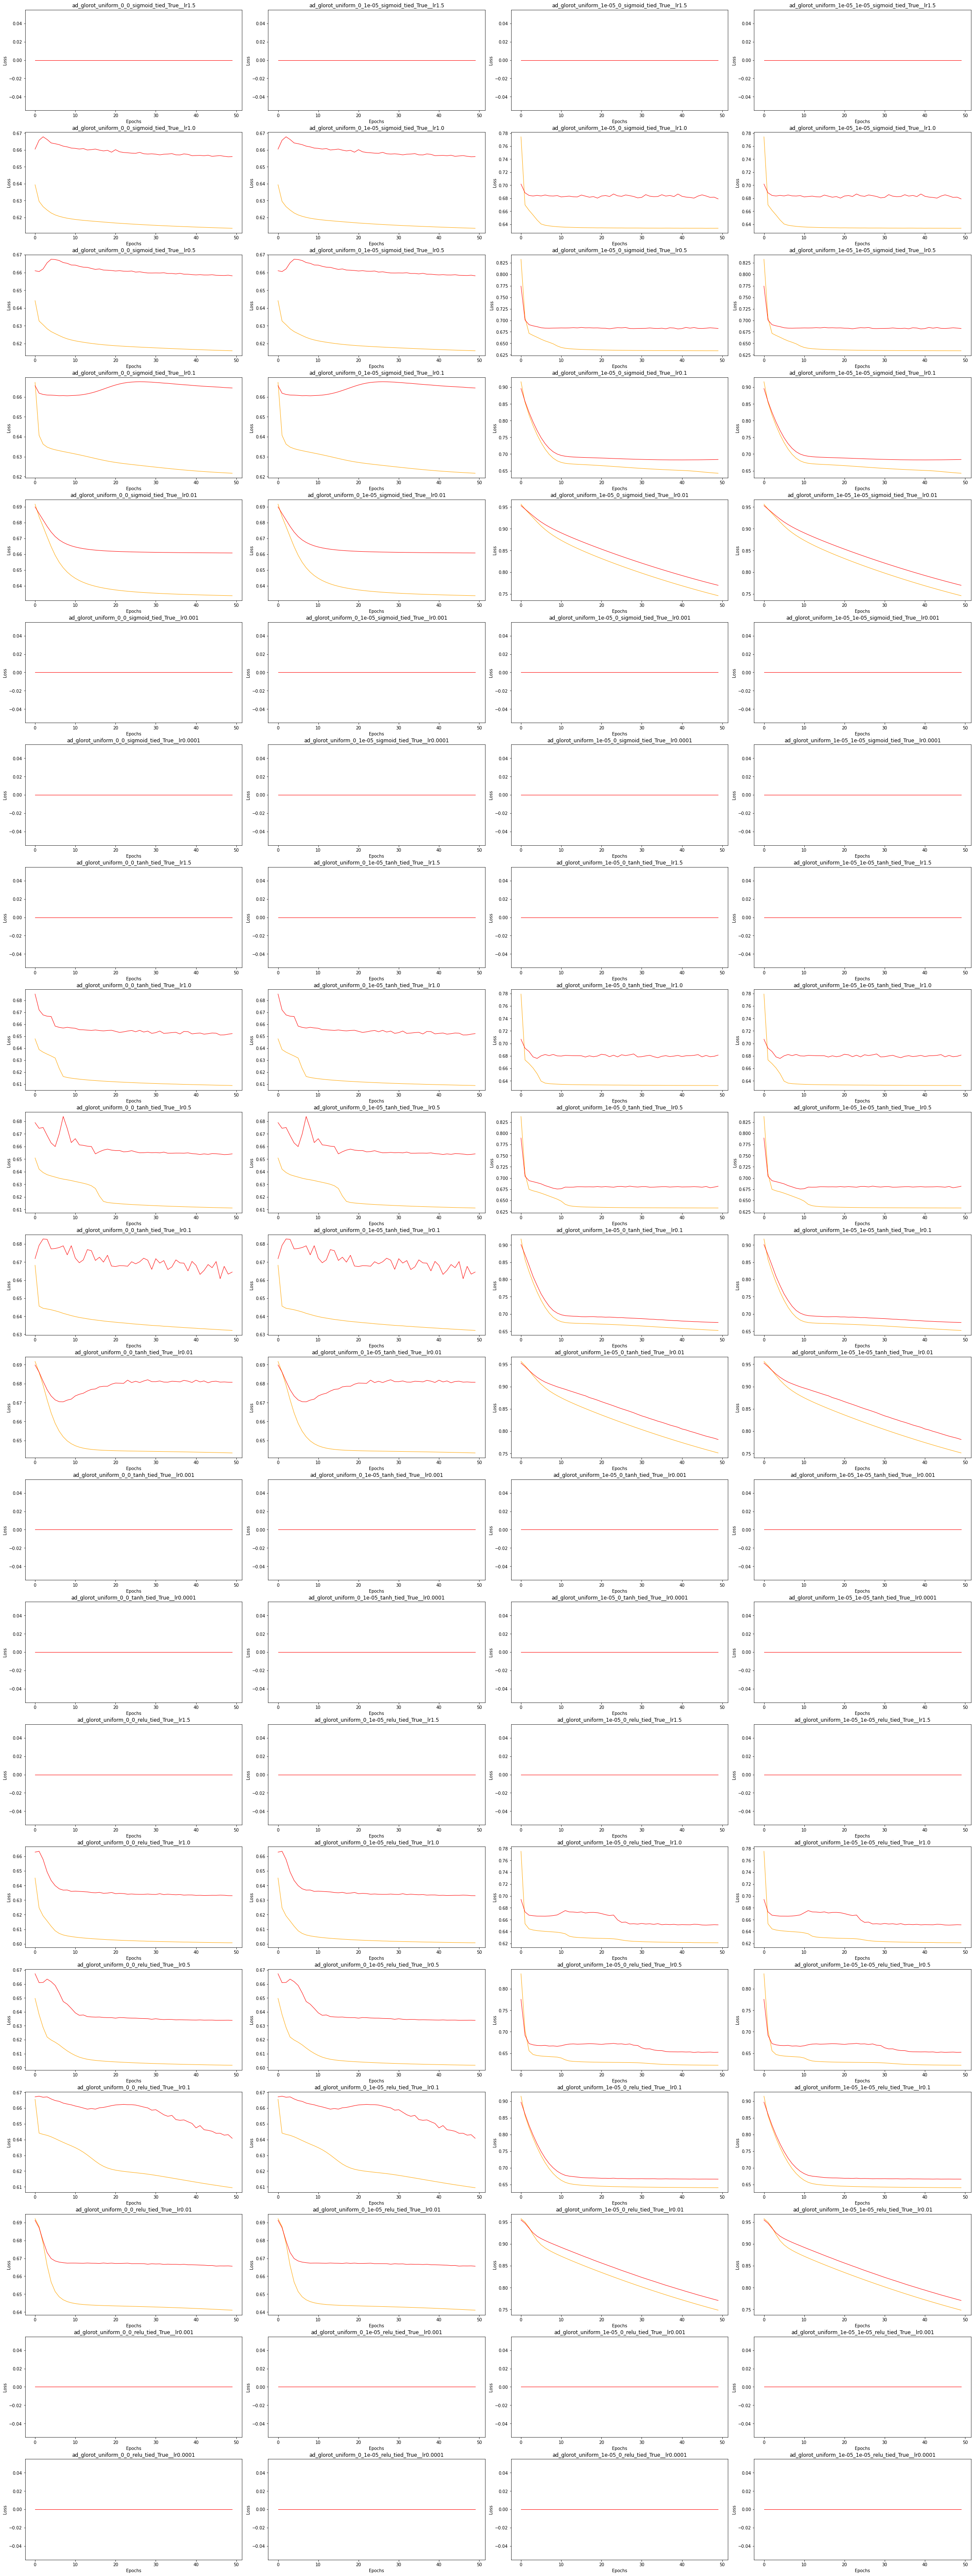

In [20]:
minn=float('inf')
for mo in model_dict_da.keys():
    minn_t = min(model_dict_da[mo].val_loss)
    if(minn_t > 0):
        minn = min(minn, minn_t)

maxx=float('-inf')
for mo in model_dict_da.keys():
    maxx_t = max(model_dict_da[mo].val_loss)
    maxx = max(maxx, maxx_t)

print(minn)
print(maxx)

inits = ['glorot_uniform'] #,'glorot_normal'
L1_norm = [0, 1e-5] # , 1e-10
L2_norm = [0, 1e-5] # , 1e-10
act_fun = ['sigmoid', 'tanh', 'relu'] # , 'tanh','relu'
tied = [True] #, False
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

yd = len(inits) * len(L1_norm) * len(tied) * len(L2_norm)
xd = len(act_fun) * len(lr)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for w in tied:
    for i in inits:
        for l in L1_norm:
            for n in L2_norm:
                for a in act_fun:
                    for t in lr:
                        seed = str(560)
                        name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                        model_temp = model_dict_da[name]
                        ax[xi,yi].plot(list(range(0,50)), model_temp.loss[:50], linewidth=1, markersize=2, color = 'orange')
                        ax[xi,yi].plot(list(range(0,50)), model_temp.val_loss[:50], linewidth=1, markersize=2, color = 'red')
                        ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                        #ax[xi,yi].set_ylim(minn,maxx)
                        xi = xi+1
                xi=0
                yi=yi+1


    

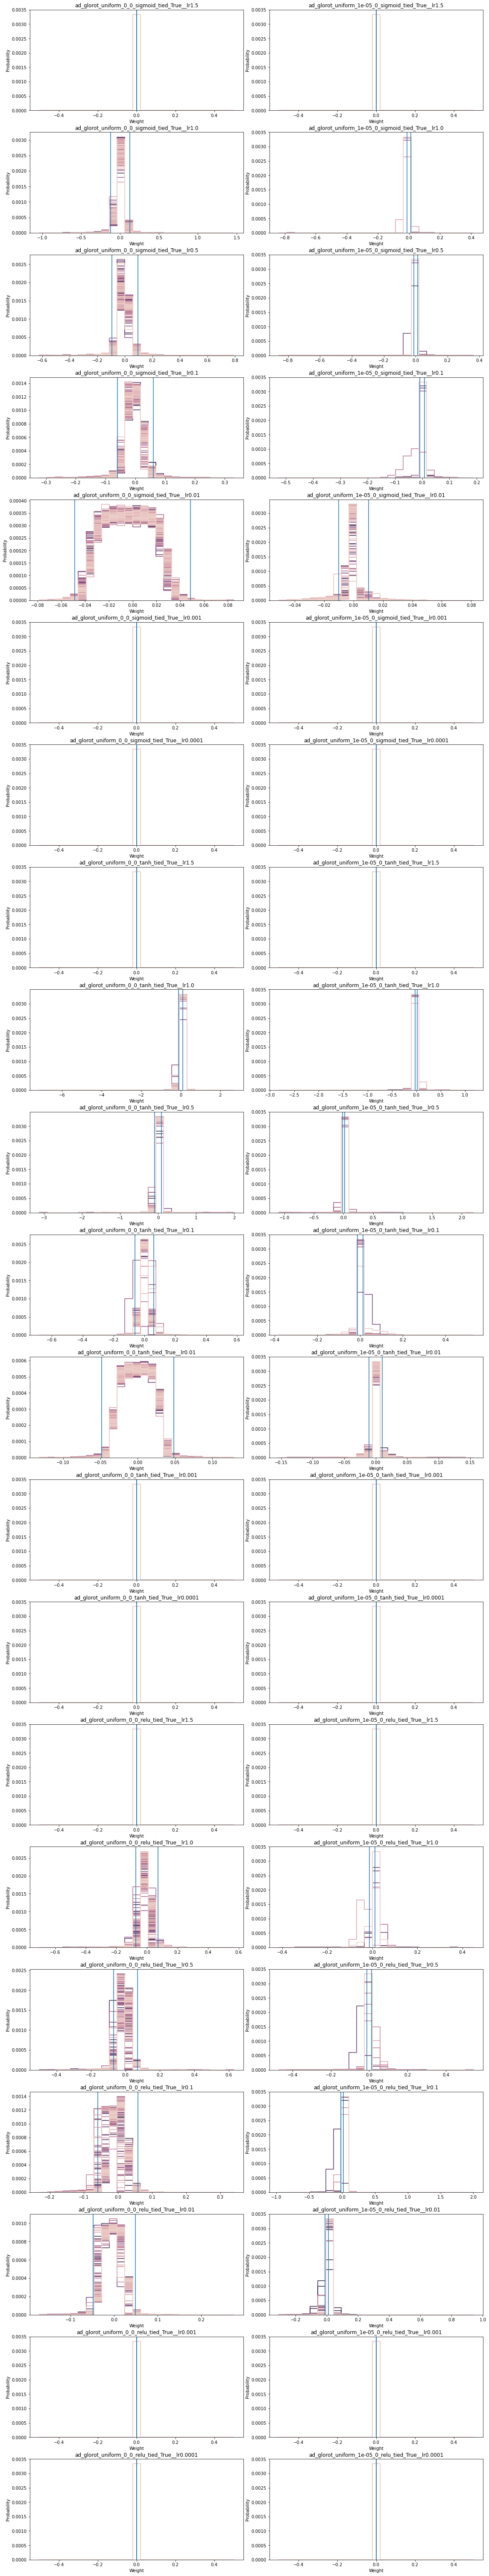

In [21]:
inits = ['glorot_uniform'] #,'glorot_normal'
L1_norm = [0, 1e-5] # , 1e-10
L2_norm = [0] # , 1e-5, 1e-10
act_fun = ['sigmoid', 'tanh', 'relu'] # , 'tanh','relu'
tied = [True] #, False
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

yd = len(inits) * len(L1_norm) * len(tied) * len(L2_norm)
xd = len(act_fun) * len(lr)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for w in tied:
    for i in inits:
        for l in L1_norm:
            for n in L2_norm:
                for a in act_fun:
                    for t in lr:
                        seed = str(560)
                        name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                        model_temp = model_dict_da[name]
                        sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,0:300])),
                         x='value', hue='variable', legend=False,element='step',fill=False,
                         ax=ax[xi,yi], bins=25, stat='probability') #, bins=50
                        ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                        ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                        ax[xi,yi].set(title = name, xlabel = 'Weight')
                        xi = xi+1
                xi=0
                yi=yi+1


    

RNAseq DCA

0.6064646244049072
0.9543583393096924


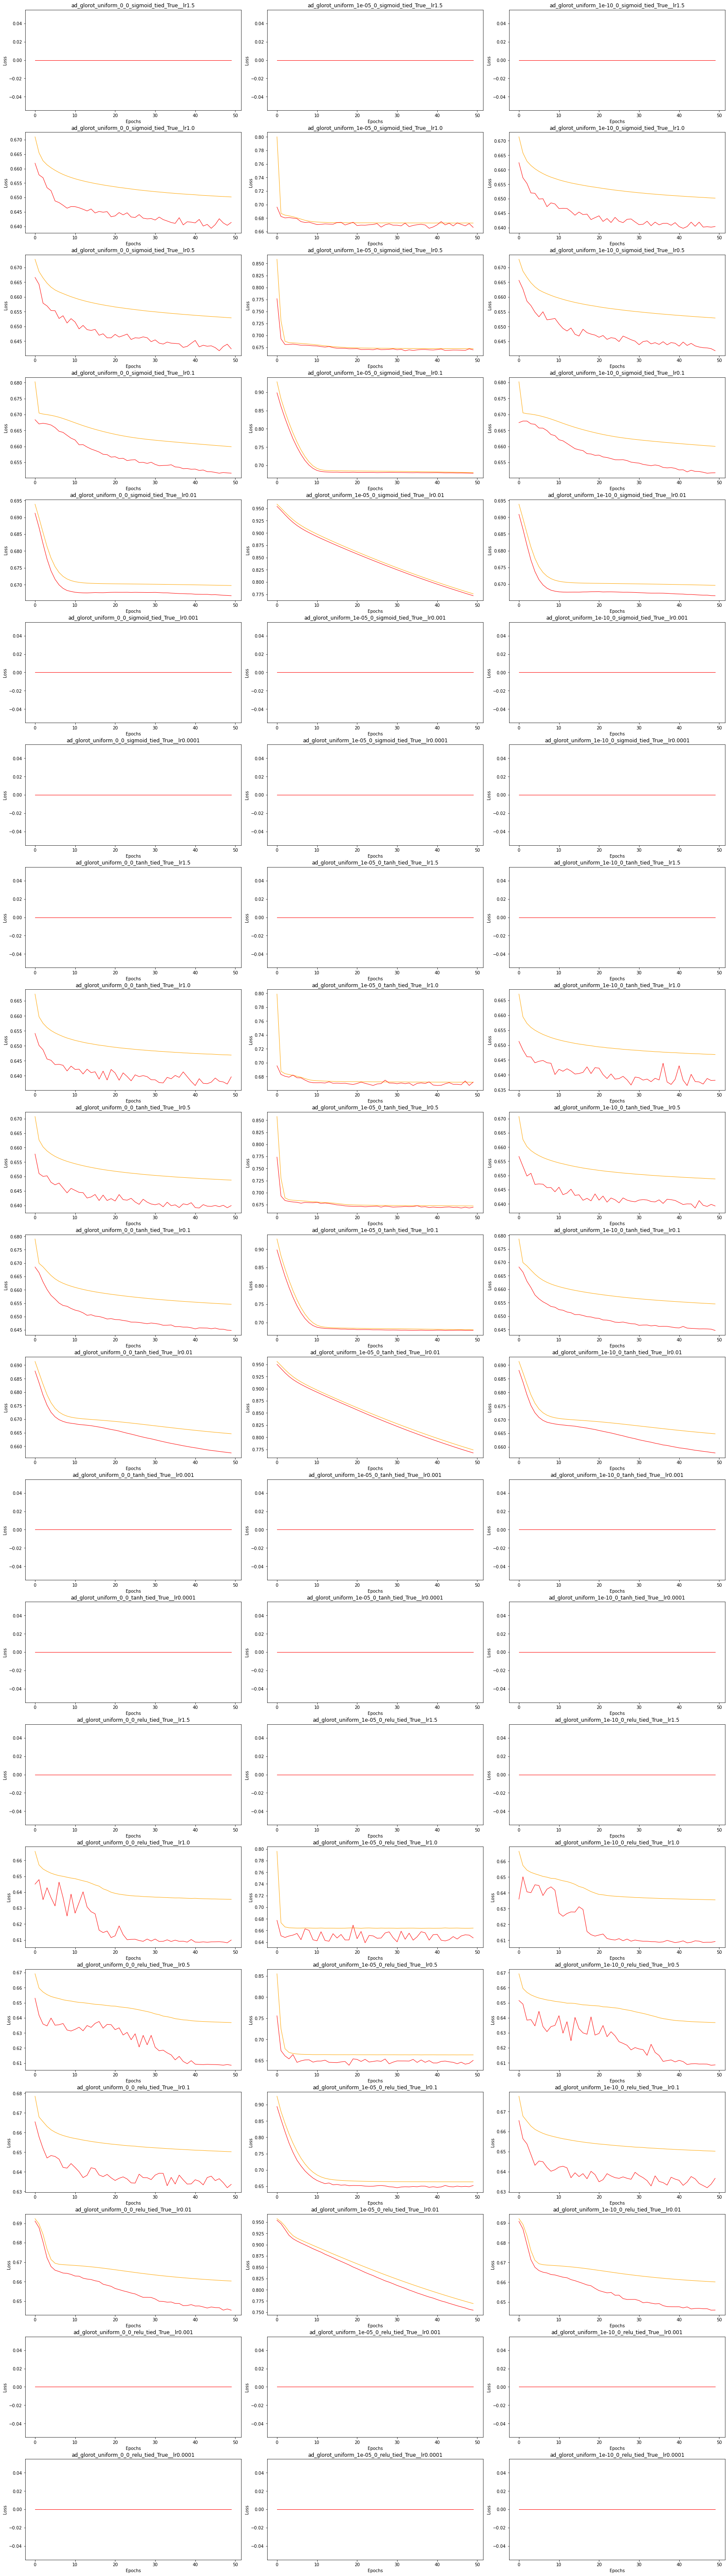

In [19]:
minn=float('inf')
for mo in model_dict_dca.keys():
    minn_t = min(model_dict_dca[mo].val_loss)
    if(minn_t > 0):
        minn = min(minn, minn_t)

maxx=float('-inf')
for mo in model_dict_dca.keys():
    maxx_t = max(model_dict_dca[mo].val_loss)
    maxx = max(maxx, maxx_t)

print(minn)
print(maxx)

inits = ['glorot_uniform'] #,'glorot_normal'
L1_norm = [0, 1e-5, 1e-10] # , 1e-10
L2_norm = [0] # , 1e-10
act_fun = ['sigmoid', 'tanh', 'relu'] # , 'tanh','relu'
tied = [True] #, False
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

yd = len(inits) * len(L1_norm) * len(tied) * len(L2_norm)
xd = len(act_fun) * len(lr)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for w in tied:
    for i in inits:
        for l in L1_norm:
            for n in L2_norm:
                for a in act_fun:
                    for t in lr:
                        seed = str(660)
                        name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                        model_temp = model_dict_dca[name]
                        ax[xi,yi].plot(list(range(0,50)), model_temp.loss[:50], linewidth=1, markersize=2, color = 'orange')
                        ax[xi,yi].plot(list(range(0,50)), model_temp.val_loss[:50], linewidth=1, markersize=2, color = 'red')
                        ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                        #ax[xi,yi].set_ylim(minn,maxx)
                        xi = xi+1
                xi=0
                yi=yi+1


    

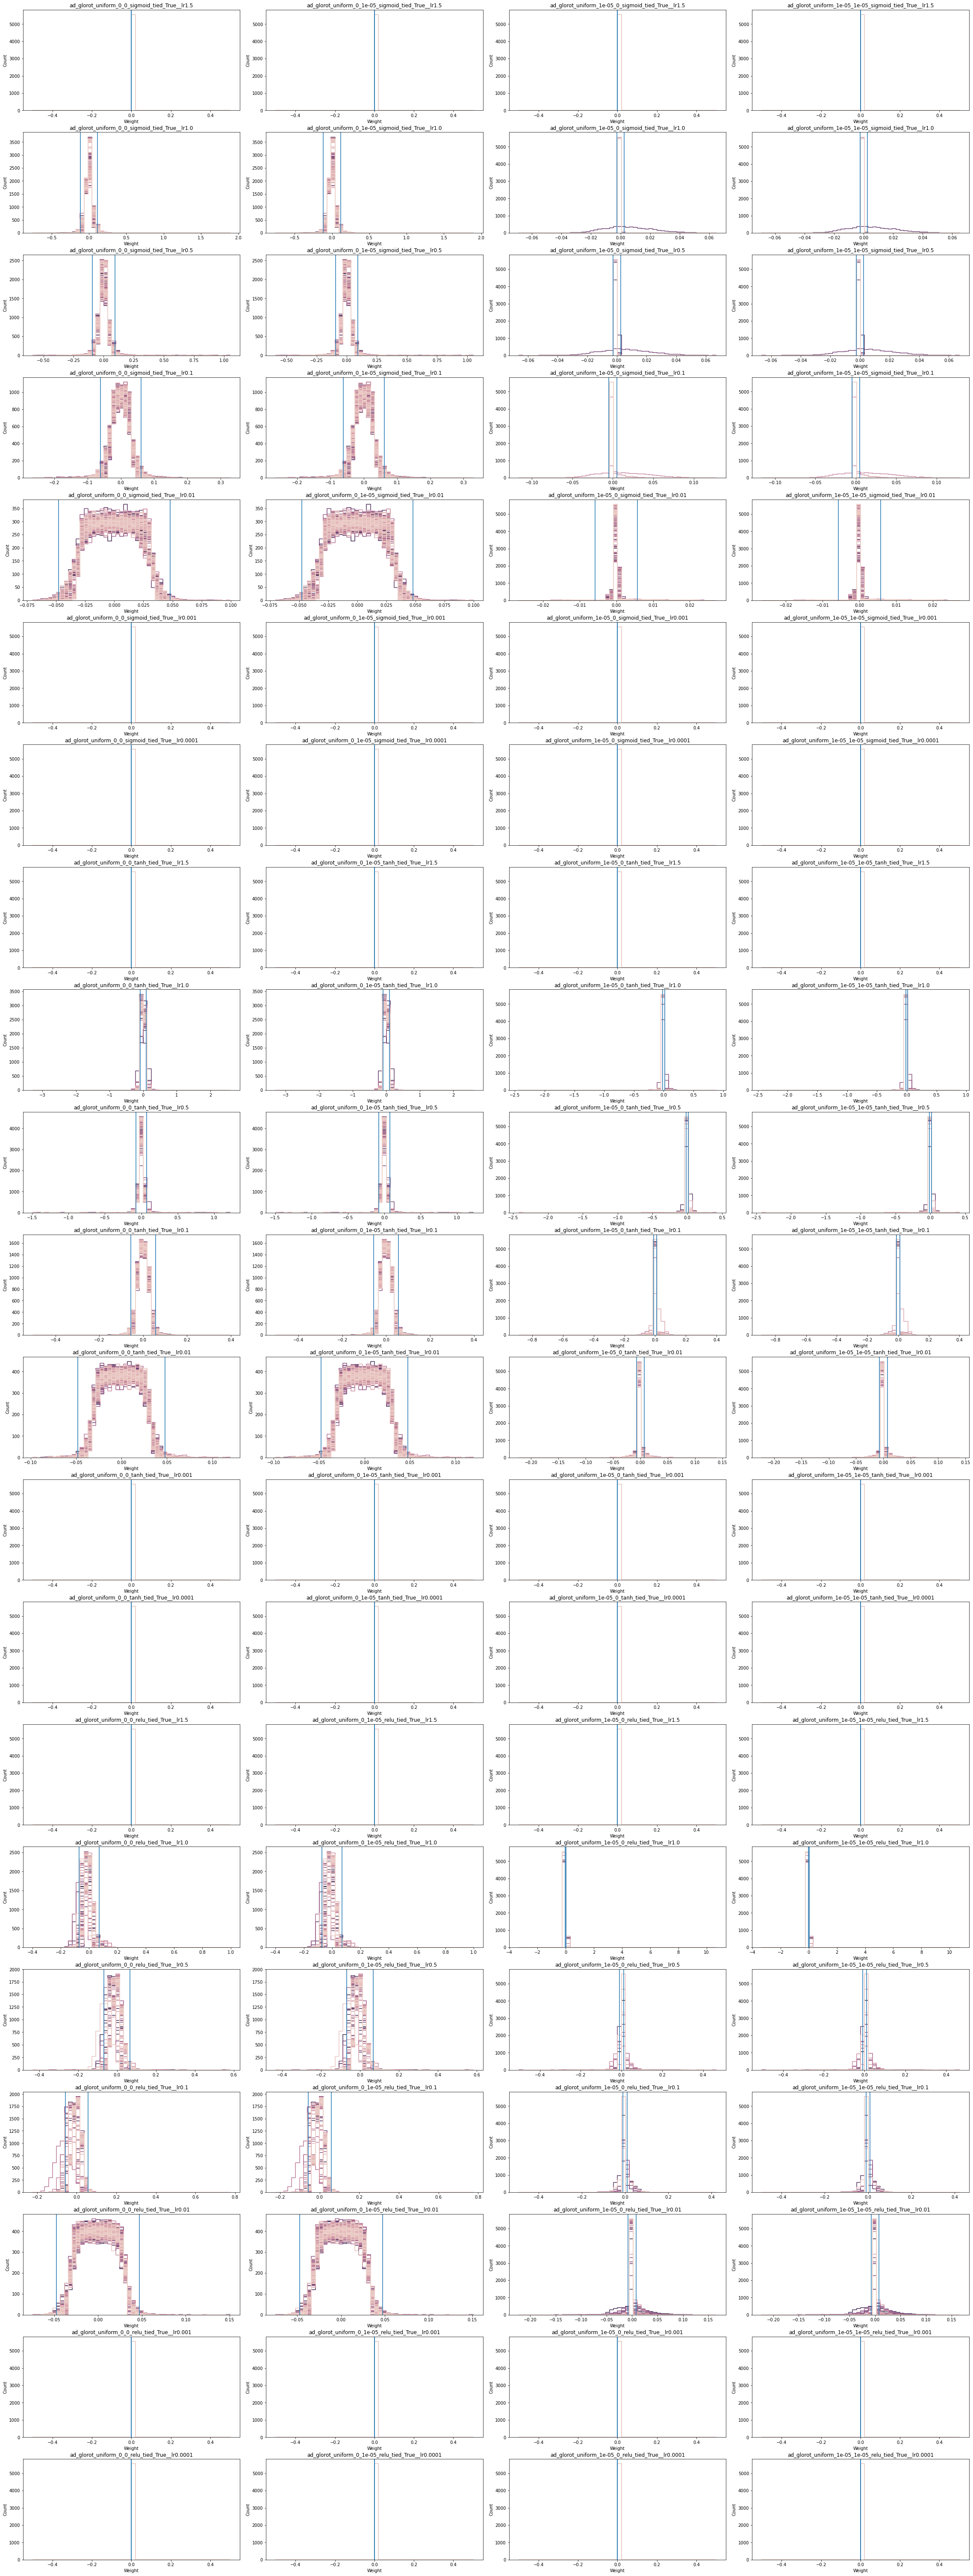

In [12]:
inits = ['glorot_uniform'] #,'glorot_normal'
L1_norm = [0, 1e-5] # , 1e-10
L2_norm = [0, 1e-5] # , 1e-10
act_fun = ['sigmoid', 'tanh', 'relu'] # , 'tanh','relu'
tied = [True] #, False
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

yd = len(inits) * len(L1_norm) * len(tied) * len(L2_norm)
xd = len(act_fun) * len(lr)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for w in tied:
    for i in inits:
        for l in L1_norm:
            for n in L2_norm:
                for a in act_fun:
                    for t in lr:
                        seed = str(560)
                        name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                        model_temp = model_dict_dca[name]
                        sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,0:300])),
                         x='value', hue='variable', legend=False,element='step',fill=False,
                         ax=ax[xi,yi], bins=50)
                        ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                        ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                        ax[xi,yi].set(title = name, xlabel = 'Weight')
                        xi = xi+1
                xi=0
                yi=yi+1


    

RNAseq DCA 0-1

1.722978115081787
35.22776794433594


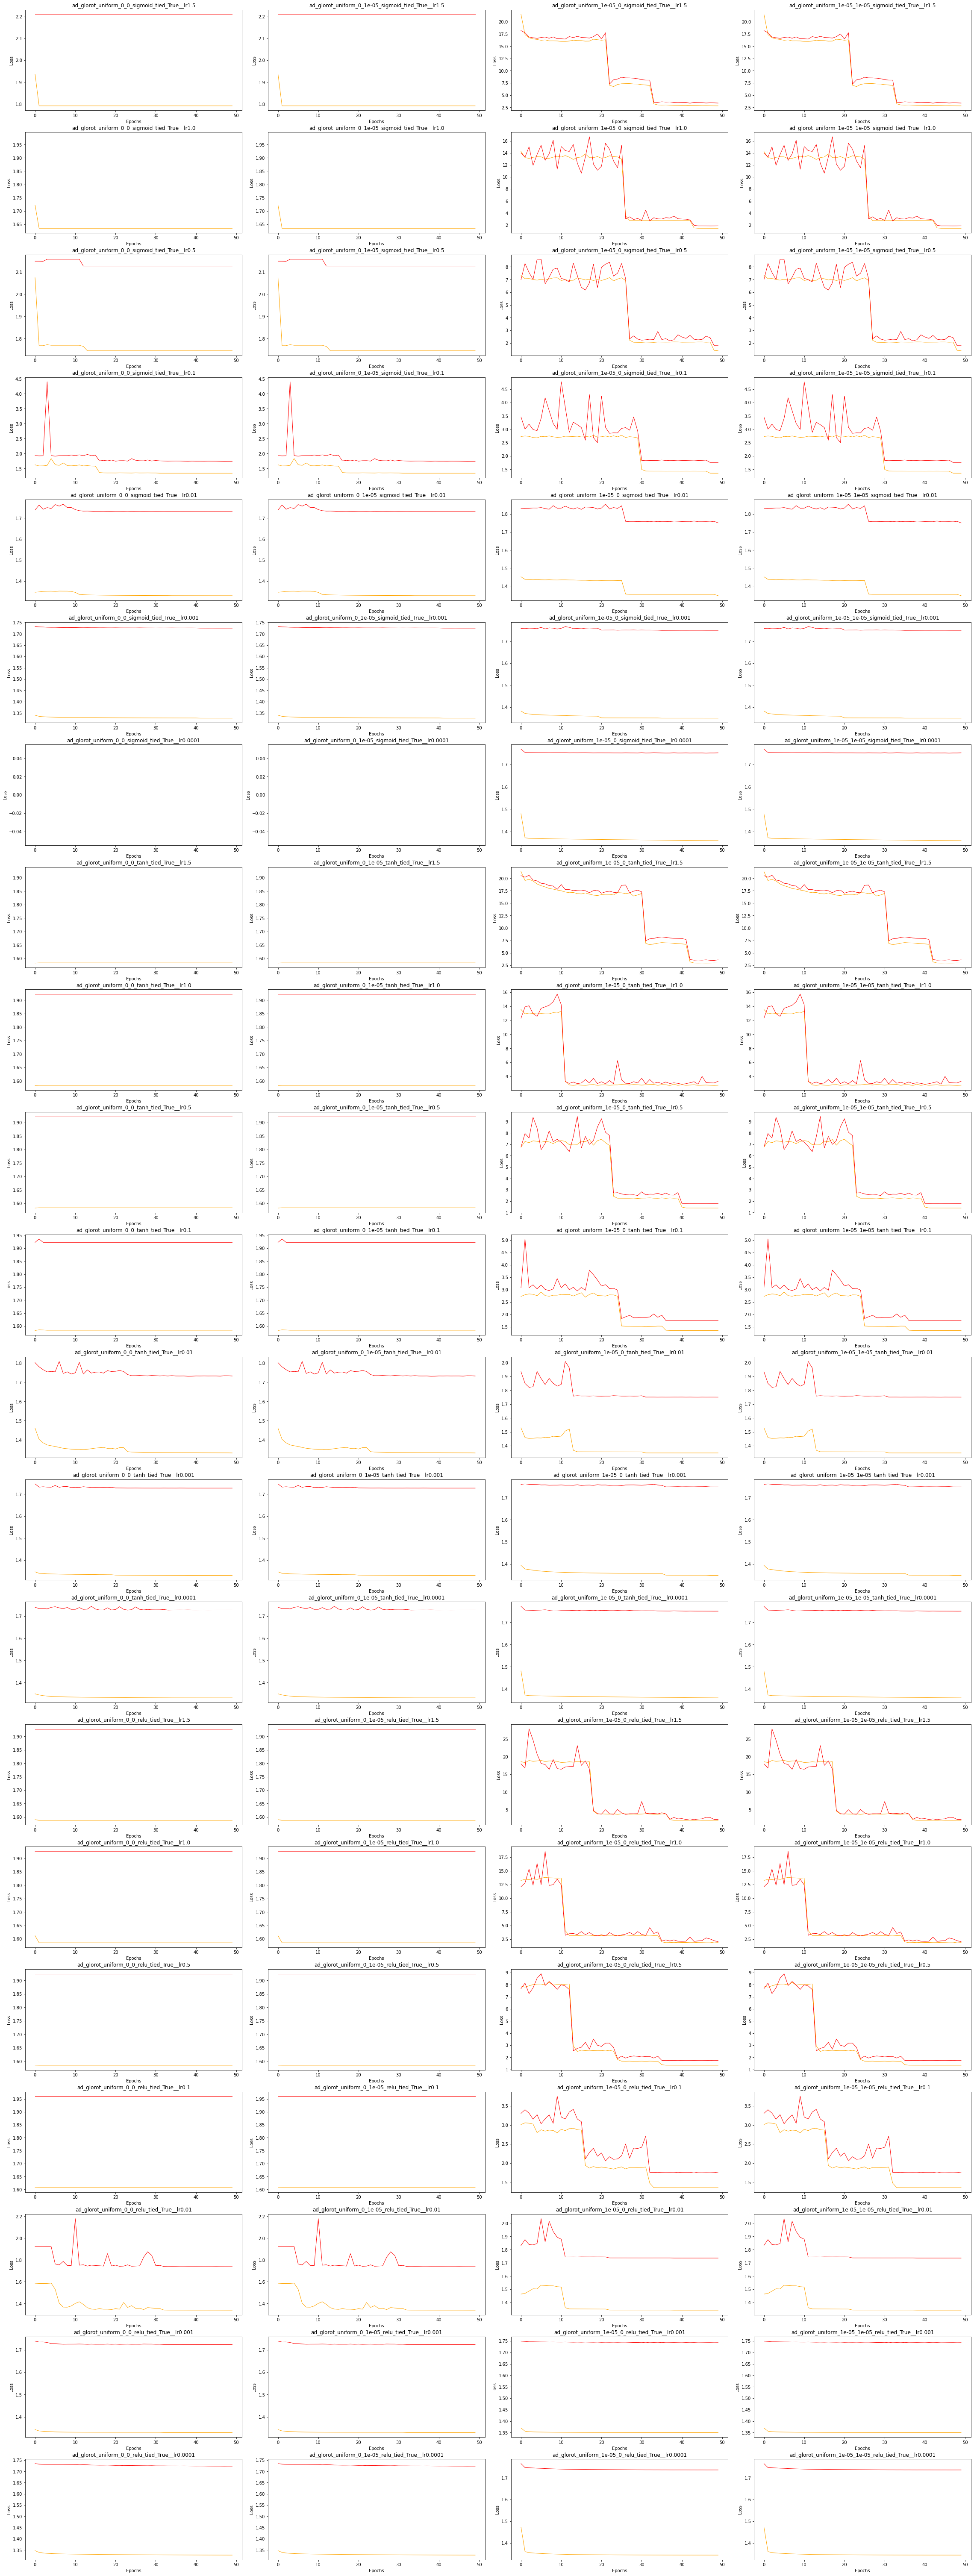

In [26]:
minn=float('inf')
for mo in model_dict_dca.keys():
    minn_t = min(model_dict_dca01[mo].val_loss)
    if(minn_t > 0):
        minn = min(minn, minn_t)

maxx=float('-inf')
for mo in model_dict_dca.keys():
    maxx_t = max(model_dict_dca01[mo].val_loss)
    maxx = max(maxx, maxx_t)

print(minn)
print(maxx)

inits = ['glorot_uniform'] #,'glorot_normal'
L1_norm = [0,1e-5] # , 1e-10
L2_norm = [0, 1e-5] # , 1e-10
act_fun = ['sigmoid', 'tanh', 'relu'] # , 'tanh','relu'
tied = [True] #, False
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

yd = len(inits) * len(L1_norm) * len(tied) * len(L2_norm)
xd = len(act_fun) * len(lr)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for w in tied:
    for i in inits:
        for l in L1_norm:
            for n in L2_norm:
                for a in act_fun:
                    for t in lr:
                        seed = str(560)
                        name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                        model_temp = model_dict_dca01[name]
                        ax[xi,yi].plot(list(range(0,50)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                        ax[xi,yi].plot(list(range(0,50)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                        ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                        #ax[xi,yi].set_ylim(minn,maxx)
                        xi = xi+1
                xi=0
                yi=yi+1


    

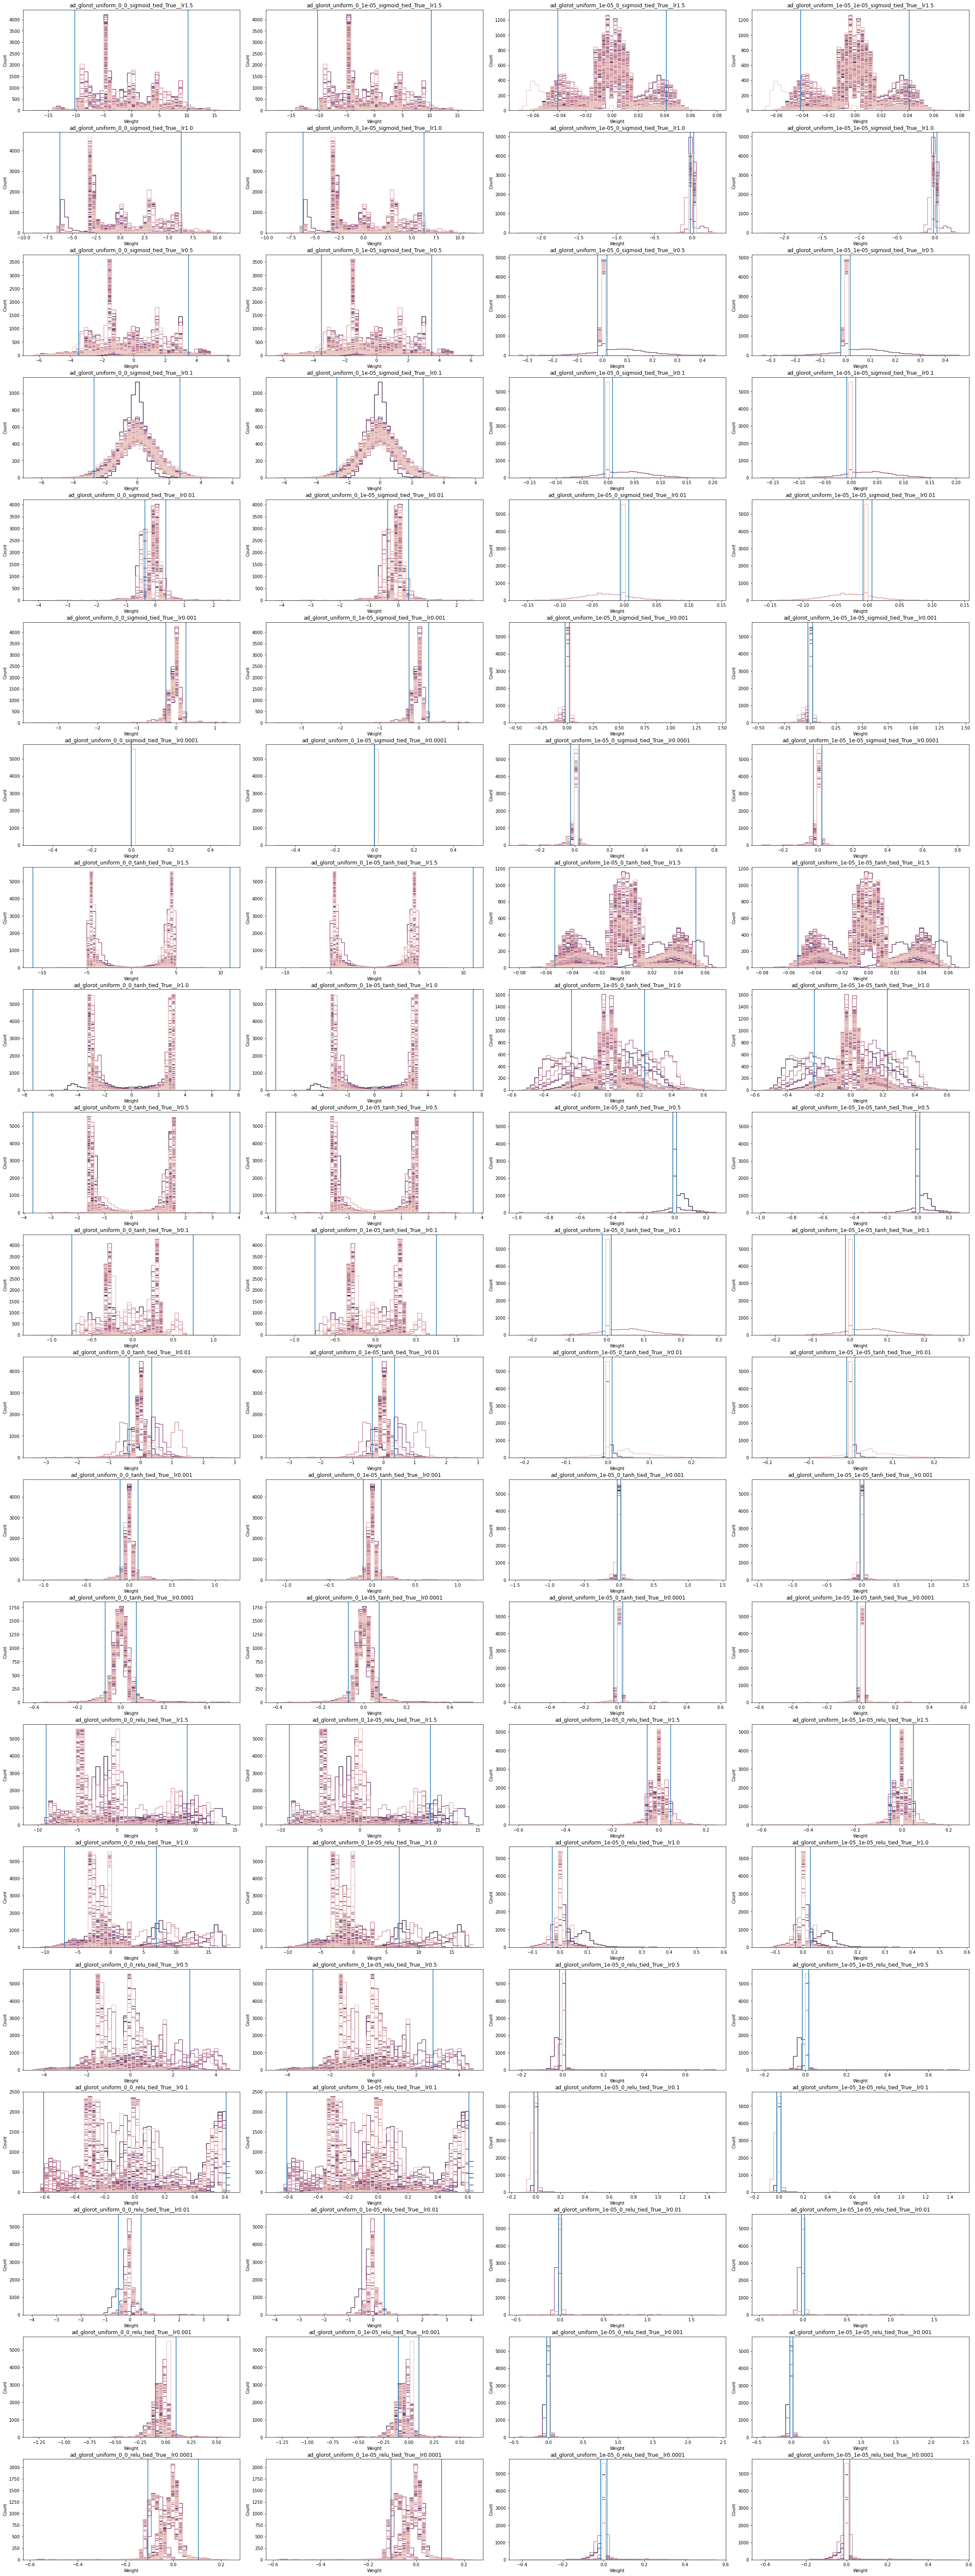

In [27]:
inits = ['glorot_uniform'] #,'glorot_normal'
L1_norm = [0, 1e-5] # , 1e-10
L2_norm = [0, 1e-5] # , 1e-10
act_fun = ['sigmoid', 'tanh', 'relu'] # , 'tanh','relu'
tied = [True] #, False
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

yd = len(inits) * len(L1_norm) * len(tied) * len(L2_norm)
xd = len(act_fun) * len(lr)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for w in tied:
    for i in inits:
        for l in L1_norm:
            for n in L2_norm:
                for a in act_fun:
                    for t in lr:
                        seed = str(560)
                        name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                        model_temp = model_dict_dca01[name]
                        sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,0:300])),
                         x='value', hue='variable', legend=False,element='step',fill=False,
                         ax=ax[xi,yi], bins=50)
                        ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                        ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                        ax[xi,yi].set(title = name, xlabel = 'Weight')
                        xi = xi+1
                xi=0
                yi=yi+1


    

In [ ]:
RNAseq DCA floor

2892.296142578125
3343.94140625


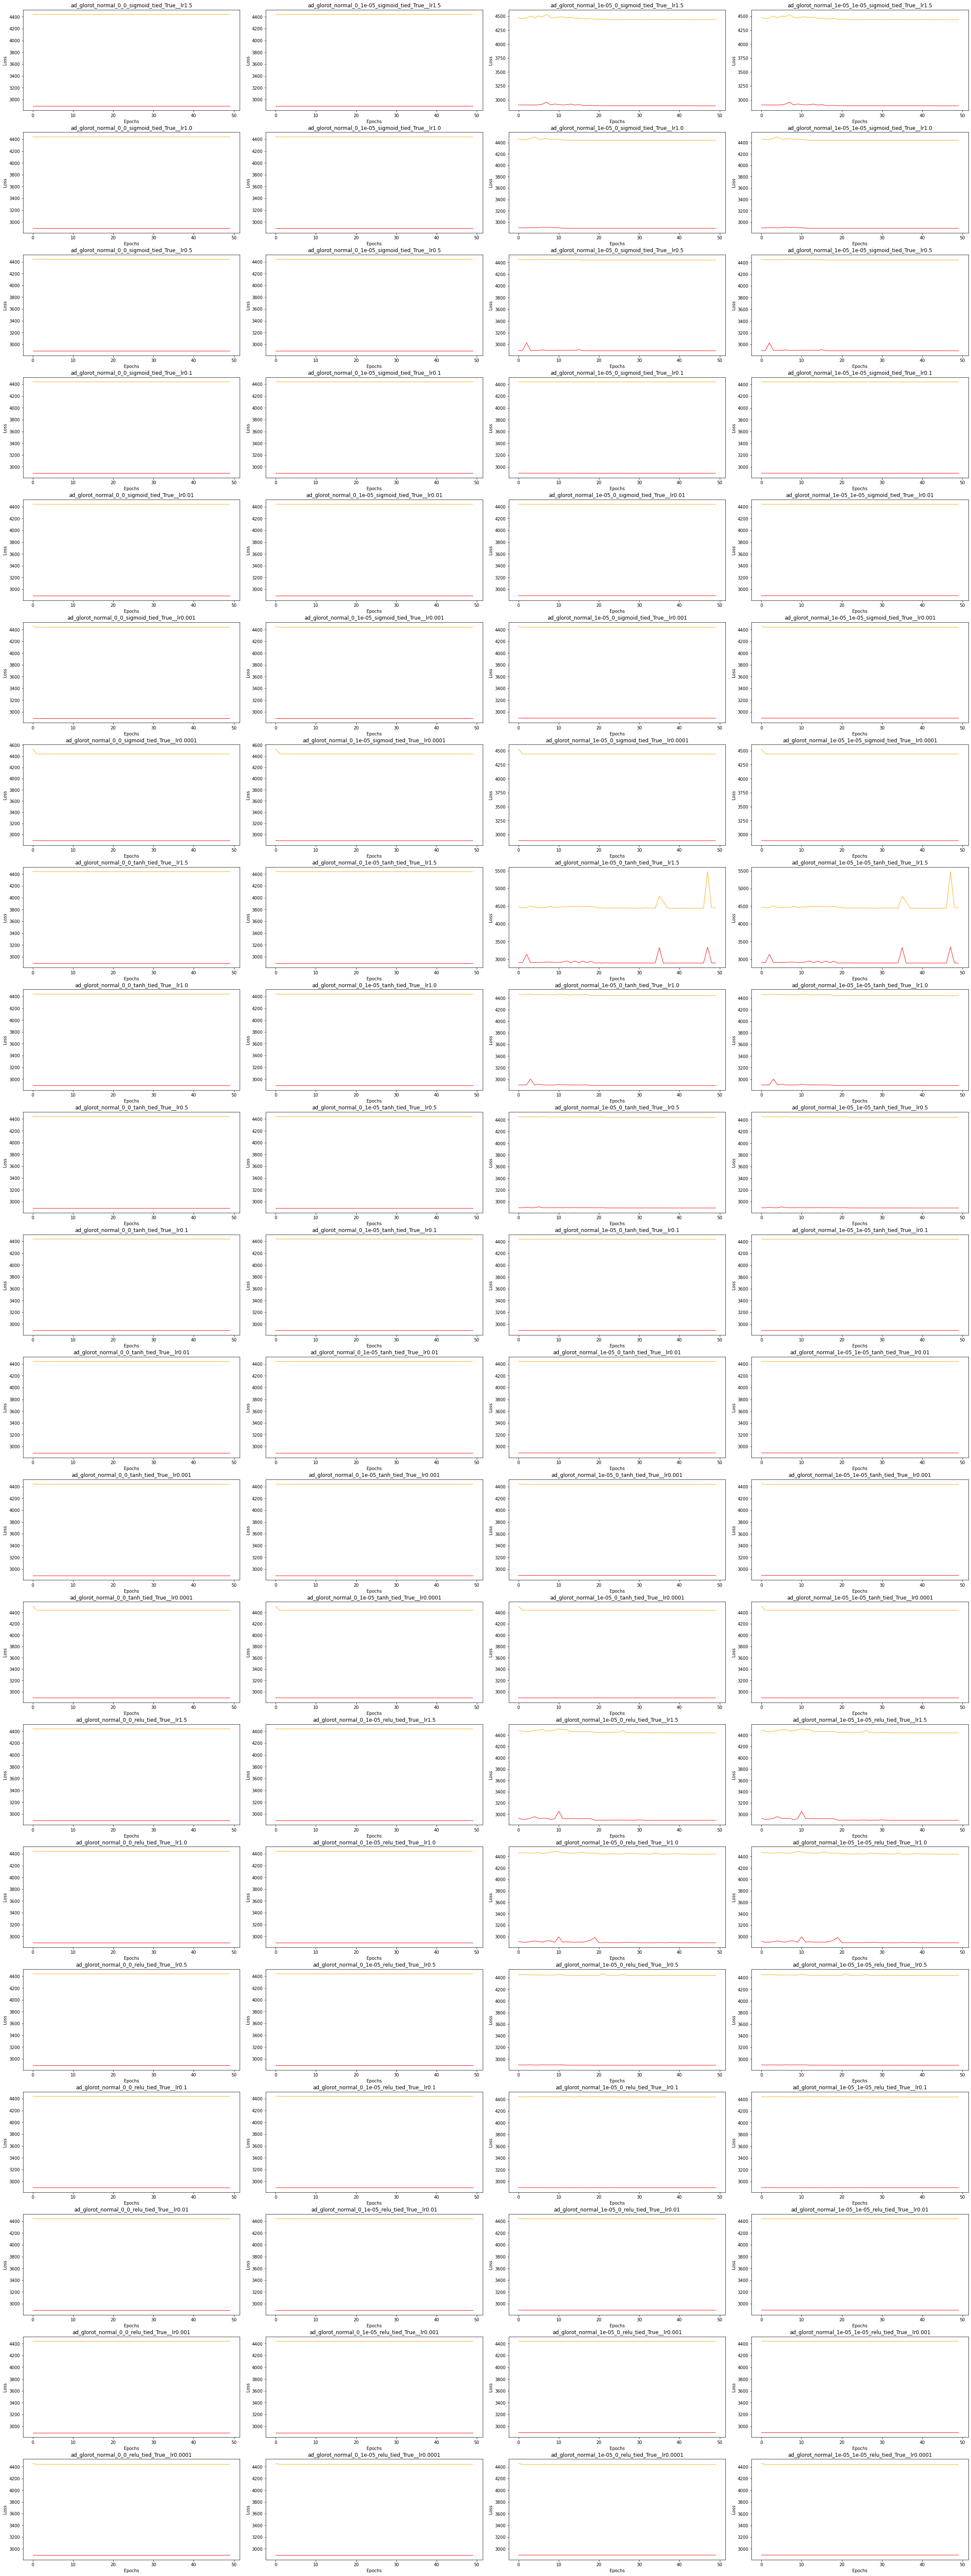

In [12]:
minn=float('inf')
for mo in model_dict_dca.keys():
    minn_t = min(model_dict_floor[mo].val_loss)
    if(minn_t > 0):
        minn = min(minn, minn_t)

maxx=float('-inf')
for mo in model_dict_dca.keys():
    maxx_t = max(model_dict_floor[mo].val_loss)
    maxx = max(maxx, maxx_t)

print(minn)
print(maxx)

inits = ['glorot_normal'] #,'glorot_uniform'
L1_norm = [0, 1e-5] # , 1e-10
L2_norm = [0, 1e-5] # , 1e-10
act_fun = ['sigmoid', 'tanh', 'relu'] # , 'tanh','relu'
tied = [True] #, False
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

yd = len(inits) * len(L1_norm) * len(tied) * len(L2_norm)
xd = len(act_fun) * len(lr)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for w in tied:
    for i in inits:
        for l in L1_norm:
            for n in L2_norm:
                for a in act_fun:
                    for t in lr:
                        seed = str(560)
                        name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                        model_temp = model_dict_floor[name]
                        ax[xi,yi].plot(list(range(0,50)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                        ax[xi,yi].plot(list(range(0,50)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                        ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                        #ax[xi,yi].set_ylim(minn,maxx)
                        xi = xi+1
                xi=0
                yi=yi+1


    

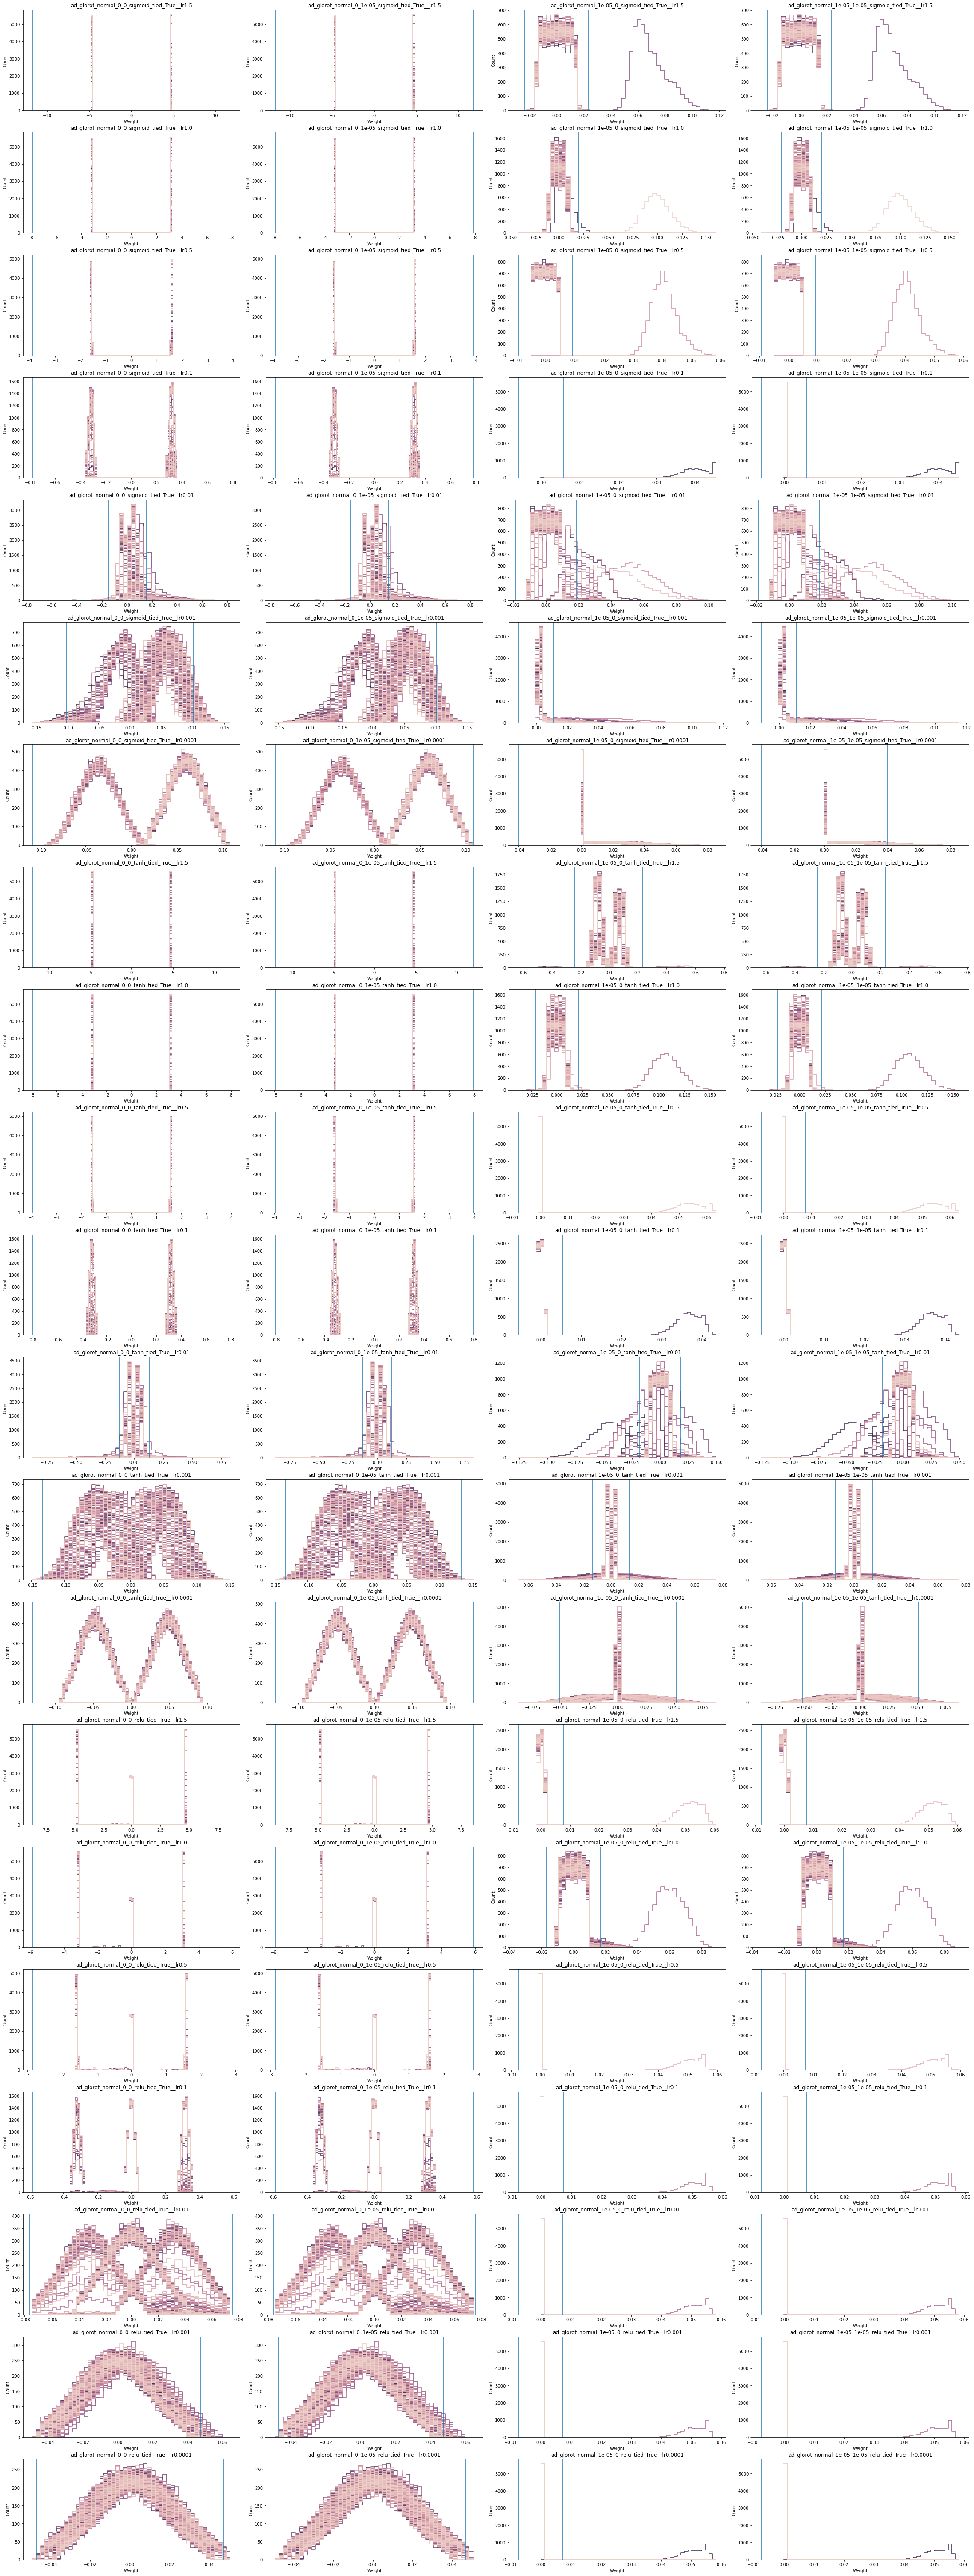

In [13]:
inits = ['glorot_normal'] #,'glorot_normal'
L1_norm = [0, 1e-5] # , 1e-10
L2_norm = [0, 1e-5] # , 1e-10
act_fun = ['sigmoid', 'tanh', 'relu'] # , 'tanh','relu'
tied = [True] #, False
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

yd = len(inits) * len(L1_norm) * len(tied) * len(L2_norm)
xd = len(act_fun) * len(lr)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for w in tied:
    for i in inits:
        for l in L1_norm:
            for n in L2_norm:
                for a in act_fun:
                    for t in lr:
                        seed = str(560)
                        name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                        model_temp = model_dict_floor[name]
                        sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,0:300])),
                         x='value', hue='variable', legend=False,element='step',fill=False,
                         ax=ax[xi,yi], bins=50)
                        ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                        ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                        ax[xi,yi].set(title = name, xlabel = 'Weight')
                        xi = xi+1
                xi=0
                yi=yi+1


    

Array DA

0.5981885194778442
0.9632192254066468


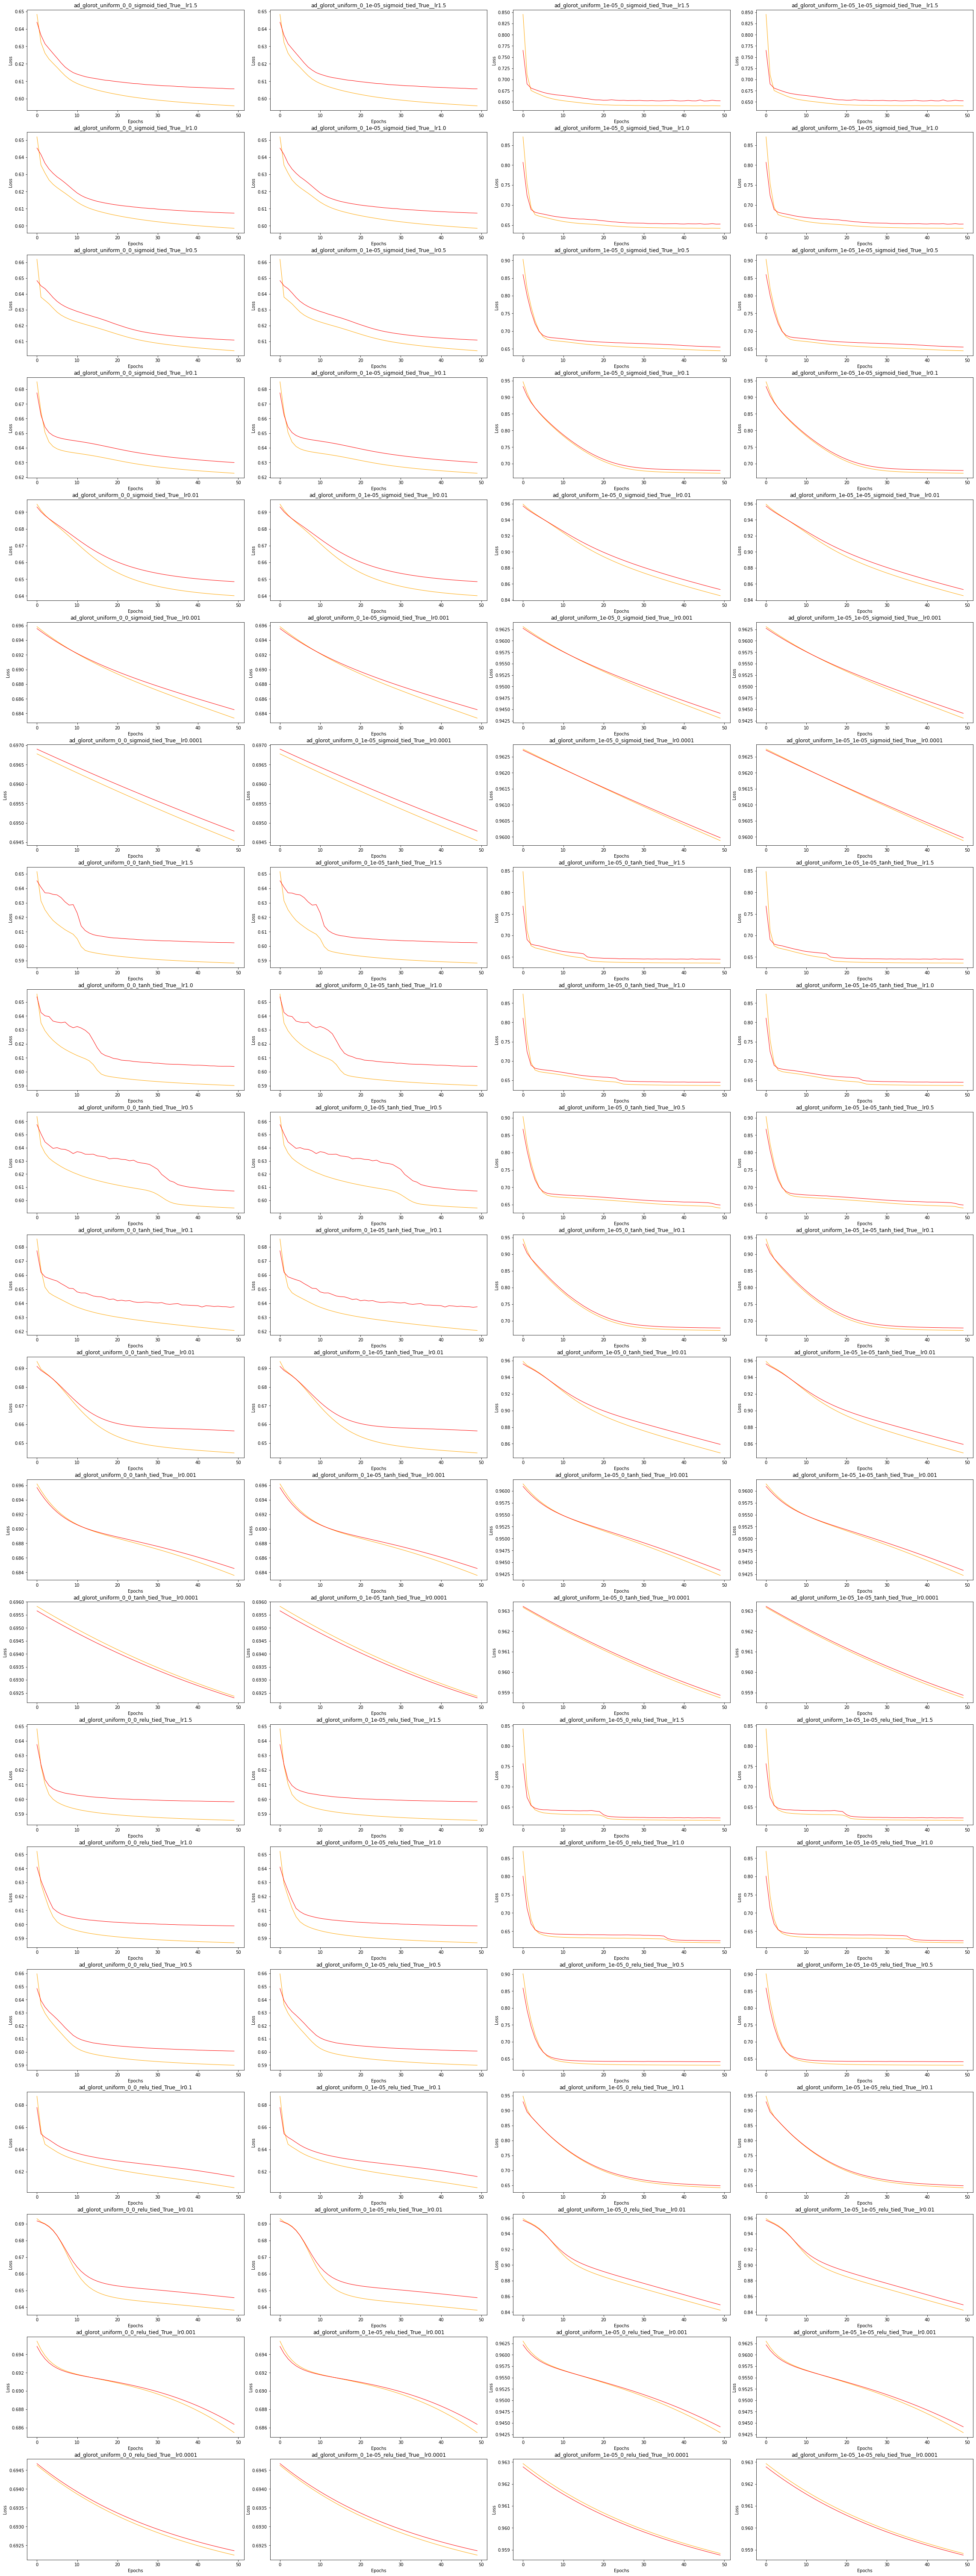

In [14]:
minn=float('inf')
for mo in model_dict_dca.keys():
    minn_t = min(model_dict_arr[mo].val_loss)
    if(minn_t > 0):
        minn = min(minn, minn_t)

maxx=float('-inf')
for mo in model_dict_dca.keys():
    maxx_t = max(model_dict_arr[mo].val_loss)
    maxx = max(maxx, maxx_t)

print(minn)
print(maxx)

inits = ['glorot_uniform'] #,'glorot_normal'
L1_norm = [0, 1e-5] # , 1e-10
L2_norm = [0, 1e-5] # , 1e-10
act_fun = ['sigmoid', 'tanh', 'relu'] # , 'tanh','relu'
tied = [True] #, False
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

yd = len(inits) * len(L1_norm) * len(tied) * len(L2_norm)
xd = len(act_fun) * len(lr)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for w in tied:
    for i in inits:
        for l in L1_norm:
            for n in L2_norm:
                for a in act_fun:
                    for t in lr:
                        seed = str(560)
                        name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                        model_temp = model_dict_arr[name]
                        ax[xi,yi].plot(list(range(0,50)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                        ax[xi,yi].plot(list(range(0,50)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                        ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                        #ax[xi,yi].set_ylim(minn,maxx)
                        xi = xi+1
                xi=0
                yi=yi+1


    

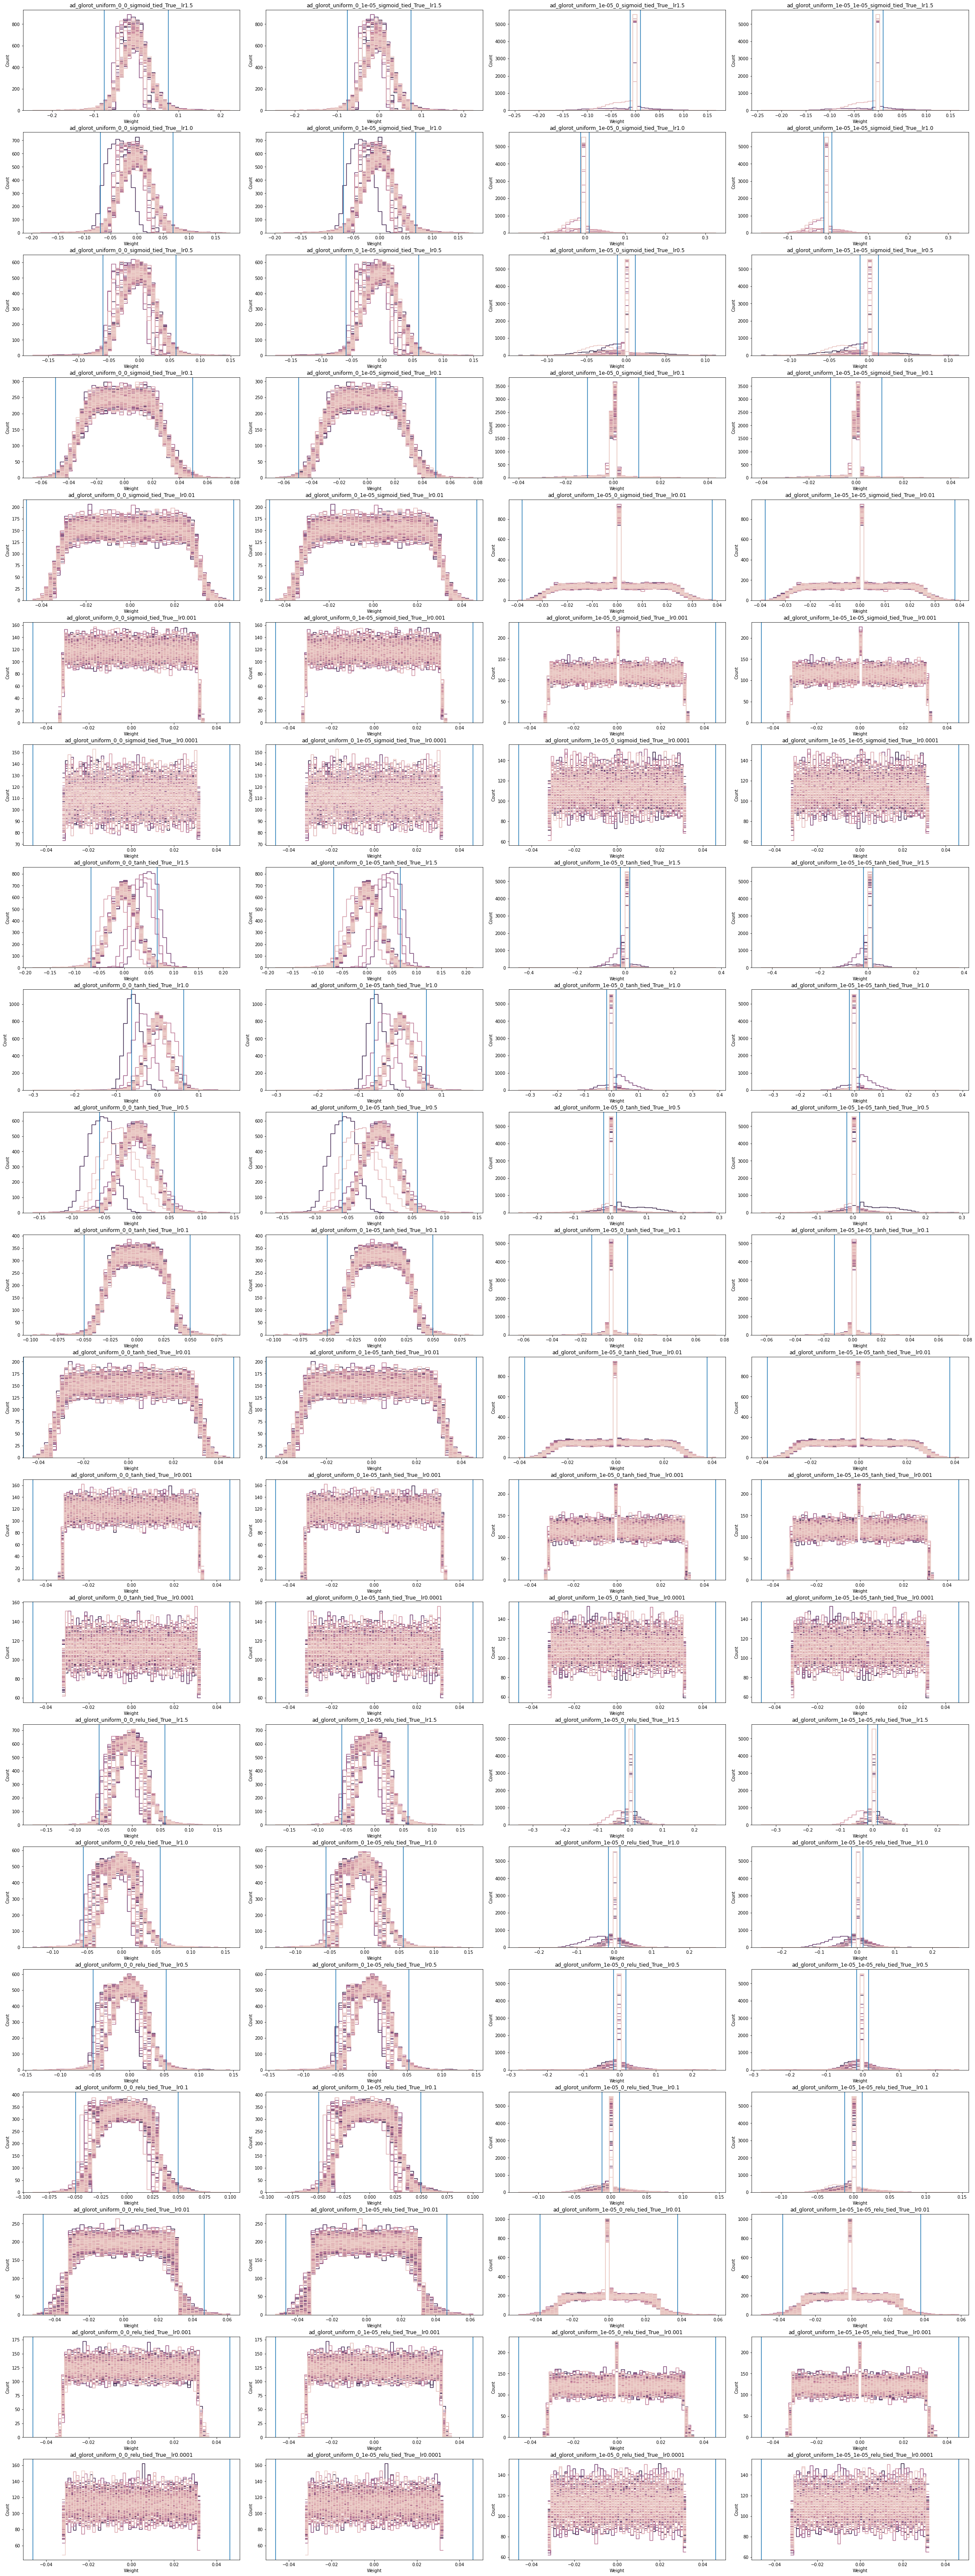

In [15]:
inits = ['glorot_uniform'] #,'glorot_uniform'
L1_norm = [0, 1e-5] # , 1e-10
L2_norm = [0, 1e-5] # , 1e-10
act_fun = ['sigmoid', 'tanh', 'relu'] # , 'tanh','relu'
tied = [True] #, False
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

yd = len(inits) * len(L1_norm) * len(tied) * len(L2_norm)
xd = len(act_fun) * len(lr)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for w in tied:
    for i in inits:
        for l in L1_norm:
            for n in L2_norm:
                for a in act_fun:
                    for t in lr:
                        seed = str(560)
                        name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                        model_temp = model_dict_arr[name]
                        sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,0:300])),
                         x='value', hue='variable', legend=False,element='step',fill=False,
                         ax=ax[xi,yi], bins=50)
                        ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                        ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                        ax[xi,yi].set(title = name, xlabel = 'Weight')
                        xi = xi+1
                xi=0
                yi=yi+1


    

Follow-up Models

In [17]:
inits = ['glorot_uniform']
L1_norm = [0, 1e-5, 1e-10,1e-15]
L2_norm = [0]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True]
lr = [1.5,1.0,0.5,0.1,0.01] 

for seed in range(1):
    for w in tied:
        for i in inits:
            #print(i)
            for l in L1_norm:
                #print(l)
                for n in L2_norm:
                    for a in act_fun:
                       # print(a)
                        for t in lr:
                            #print(t)
                            name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                            print(name)
                            m_da = run_model.run_model('../data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log_01.csv',seed=seed+560,lr=t,kl1=l,kl2=n, act = a, tied = w, epochs=50, init=i, batch_size = 10,v=0)
                                

ad_glorot_uniform_0_0_sigmoid_tied_True__lr1.5
ad_glorot_uniform_0_0_sigmoid_tied_True__lr1.0
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.5
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.1
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.01
ad_glorot_uniform_0_0_tanh_tied_True__lr1.5
ad_glorot_uniform_0_0_tanh_tied_True__lr1.0
ad_glorot_uniform_0_0_tanh_tied_True__lr0.5
ad_glorot_uniform_0_0_tanh_tied_True__lr0.1
ad_glorot_uniform_0_0_tanh_tied_True__lr0.01
ad_glorot_uniform_0_0_relu_tied_True__lr1.5
ad_glorot_uniform_0_0_relu_tied_True__lr1.0
ad_glorot_uniform_0_0_relu_tied_True__lr0.5
ad_glorot_uniform_0_0_relu_tied_True__lr0.1
ad_glorot_uniform_0_0_relu_tied_True__lr0.01
ad_glorot_uniform_1e-05_0_sigmoid_tied_True__lr1.5
ad_glorot_uniform_1e-05_0_sigmoid_tied_True__lr1.0
ad_glorot_uniform_1e-05_0_sigmoid_tied_True__lr0.5
ad_glorot_uniform_1e-05_0_sigmoid_tied_True__lr0.1
ad_glorot_uniform_1e-05_0_sigmoid_tied_True__lr0.01
ad_glorot_uniform_1e-05_0_tanh_tied_True__lr1.5
ad_glorot_uniform_

KeyboardInterrupt: 

In [4]:
inits = ['glorot_uniform']
L1_norm = [1e-10,1e-15] #1e-5,
L2_norm = [0]
act_fun = [ 'sigmoid','tanh','relu']#
tied = [True]
lr = [1.5,1.0,0.5,0.1,0.01] #

for seed in range(1):
    for w in tied:
        for i in inits:
            #print(i)
            for l in L1_norm:
                #print(l)
                for n in L2_norm:
                    for a in act_fun:
                       # print(a)
                        for t in lr:
                            #print(t)
                            name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                            print(name)
                            m_da = run_model.run_model('../data_files/pao1_aligned_rnaseq_compendium_zp2_TPM_log_01_byall.csv',seed=seed+560,lr=t,kl1=l,kl2=n, act = a, tied = w, epochs=50, init=i, batch_size = 10,v=0)
                            m_da_bg = run_model.run_model('../data_files/pao1_aligned_rnaseq_compendium_zp2_TPM_log_01_bygene.csv',seed=seed+560,lr=t,kl1=l,kl2=n, act = a, tied = w, epochs=50, init=i, batch_size = 10,v=0)
                            m_da_bs = run_model.run_model('../data_files/pao1_aligned_rnaseq_compendium_zp2_TPM_log_01_bysamp.csv',seed=seed+560,lr=t,kl1=l,kl2=n, act = a, tied = w, epochs=50, init=i, batch_size = 10,v=0)


ad_glorot_uniform_1e-10_0_sigmoid_tied_True__lr1.5
ad_glorot_uniform_1e-10_0_sigmoid_tied_True__lr1.0
ad_glorot_uniform_1e-10_0_sigmoid_tied_True__lr0.5
ad_glorot_uniform_1e-10_0_sigmoid_tied_True__lr0.1
ad_glorot_uniform_1e-10_0_sigmoid_tied_True__lr0.01
ad_glorot_uniform_1e-10_0_tanh_tied_True__lr1.5
ad_glorot_uniform_1e-10_0_tanh_tied_True__lr1.0
ad_glorot_uniform_1e-10_0_tanh_tied_True__lr0.5
ad_glorot_uniform_1e-10_0_tanh_tied_True__lr0.1
ad_glorot_uniform_1e-10_0_tanh_tied_True__lr0.01
ad_glorot_uniform_1e-10_0_relu_tied_True__lr1.5
ad_glorot_uniform_1e-10_0_relu_tied_True__lr1.0
ad_glorot_uniform_1e-10_0_relu_tied_True__lr0.5
ad_glorot_uniform_1e-10_0_relu_tied_True__lr0.1
ad_glorot_uniform_1e-10_0_relu_tied_True__lr0.01
ad_glorot_uniform_1e-15_0_sigmoid_tied_True__lr1.5
ad_glorot_uniform_1e-15_0_sigmoid_tied_True__lr1.0
ad_glorot_uniform_1e-15_0_sigmoid_tied_True__lr0.5
ad_glorot_uniform_1e-15_0_sigmoid_tied_True__lr0.1
ad_glorot_uniform_1e-15_0_sigmoid_tied_True__lr0.01
ad_glo

In [ ]:
inits = ['glorot_uniform']
L1_norm = [1e-10,1e-15] #1e-5,
L2_norm = [0]
act_fun = [ 'sigmoid','tanh','relu']#
tied = [True]
lr = [1.5,1.0,0.5,0.1,0.01] #

for seed in range(1):
    for w in tied:
        for i in inits:
            #print(i)
            for l in L1_norm:
                #print(l)
                for n in L2_norm:
                    for a in act_fun:
                       # print(a)
                        for t in lr:
                            #print(t)
                            name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                            print(name)
                            m_da = run_model.run_model('../data_files/pao1_aligned_rnaseq_compendium_zp2_TPM_log_01_byall.csv',seed=seed+560,lr=t,kl1=l,kl2=n, act = a, tied = w, epochs=50, init=i, batch_size = 10,v=0)
                            m_da_bg = run_model.run_model('../data_files/pao1_aligned_rnaseq_compendium_zp2_TPM_log_01_bygene.csv',seed=seed+560,lr=t,kl1=l,kl2=n, act = a, tied = w, epochs=50, init=i, batch_size = 10,v=0)
                            m_da_bs = run_model.run_model('../data_files/pao1_aligned_rnaseq_compendium_zp2_TPM_log_01_bysamp.csv',seed=seed+560,lr=t,kl1=l,kl2=n, act = a, tied = w, epochs=50, init=i, batch_size = 10,v=0)


In [ ]:


model_dict_da = {
    "tf_adage": tf_adage
}
model_dict_dca = {
    "tf_adage": tf_adage
}
model_dict_dca01 = {
    "tf_adage": tf_adage
}
model_dict_arr = {
    "tf_adage": tf_adage
}
model_dict_floor = {
    "tf_adage": tf_adage
}

inits = ['glorot_uniform']
L1_norm = [0, 1e-5, 1e-10]
L2_norm = [0, 1e-5, 1e-10]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True]
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

for seed in range(1):
    for w in tied:
        for i in inits:
            #print(i)
            for l in L1_norm:
                #print(l)
                for n in L2_norm:
                    for a in act_fun:
                       # print(a)
                        for t in lr:
                            #print(t)
                            name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                            print(name)
                            m_arr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,lr=t,kl1=l, kl2=n, act = a, tied = w, epochs=50, init=i, batch_size = 10,v=0)
                            model_dict_arr[name] = m_arr

 
                                                        
                                                        
                        
                                                        
                                                        
inits = ['glorot_uniform']
L1_norm = [0, 1e-5, 1e-10]
L2_norm = [0, 1e-5, 1e-10]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True]
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

for seed in range(1):
    for w in tied:
        for i in inits:
            #print(i)
            for l in L1_norm:
                #print(l)
                for n in L2_norm:
                    for a in act_fun:
                       # print(a)
                        for t in lr:
                            #print(t)
                            name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                            print(name)
                            m_da = run_model.run_model('../data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log_01.csv',seed=seed+560,lr=t,kl1=l,kl2=n, act = a, tied = w, epochs=50, init=i, batch_size = 10,v=0)
                            model_dict_da[name] = m_da
                                                        
                                                        
                                                        
                                                        
                                                    
                                                        
                                                        
inits = ['glorot_uniform']
L1_norm = [1e-15,1e-17,1e-18] # 
L2_norm = [1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True]
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

for seed in range(1):
    for w in tied:
        for i in inits:
            #print(i)
            for l in L1_norm:
                #print(l)
                for n in L2_norm:
                    for a in act_fun:
                       # print(a)
                        for t in lr:
                            #print(t)
                            name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                            print(name)
                            m_dca01 = run_count_autoencoder.run_count_autoencoder('../data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log_01.csv',seed=seed+560,lr=t,kl1=l,kl2=n, act = a, tied = w, epochs=50, init=i, batch_size = 10,v=0)
                            model_dict_dca01[name] = m_dca01

                                                        
inits = ['glorot_uniform']
L1_norm = [1e-15,1e-17,1e-18] # 
L2_norm = [1e-5]
act_fun = ['relu']
tied = [True]
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

for seed in range(1):
    for w in tied:
        for i in inits:
            #print(i)
            for l in L1_norm:
                #print(l)
                for n in L2_norm:
                    for a in act_fun:
                       # print(a)
                        for t in lr:
                            #print(t)
                            name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                            print(name)
                            m_dca = run_count_autoencoder.run_count_autoencoder('../data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log.csv',seed=seed+560,lr=t,kl1=l,kl2=n, act = a, tied = w, epochs=50, init=i, batch_size = 10,v=0)
                            model_dict_dca[name] = m_dca

                                                        
                                                        
inits = ['glorot_uniform']
L1_norm = [1e-15,1e-17,1e-18] # 
L2_norm = [1e-5]
act_fun = ['relu']
tied = [True]
lr = [1.5,1.0,0.5,0.1,0.01,0.001,0.0001] 

for seed in range(1):
    for w in tied:
        for i in inits:
            #print(i)
            for l in L1_norm:
                #print(l)
                for n in L2_norm:
                    for a in act_fun:
                       # print(a)
                        for t in lr:
                            #print(t)
                            name = 'ad_' + i + '_' + str(l) + '_' + str(n) + '_' + a + '_tied' + '_' + str(w) + '_' + '_lr' + str(t) 
                            print(name)
                            m_dca_floor = run_count_autoencoder.run_count_autoencoder('../data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_floor.csv',seed=seed+560,lr=t,kl1=l,kl2=n, act = a, tied = w, epochs=50, init=i, batch_size = 10,v=0)
                            model_dict_floor[name] = m_dca_floor


ad_glorot_uniform_0_0_sigmoid_tied_True__lr1.5
ad_glorot_uniform_0_0_sigmoid_tied_True__lr1.0
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.5
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.1
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.01
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.001
ad_glorot_uniform_0_0_sigmoid_tied_True__lr0.0001
ad_glorot_uniform_0_0_tanh_tied_True__lr1.5
ad_glorot_uniform_0_0_tanh_tied_True__lr1.0
ad_glorot_uniform_0_0_tanh_tied_True__lr0.5
ad_glorot_uniform_0_0_tanh_tied_True__lr0.1
ad_glorot_uniform_0_0_tanh_tied_True__lr0.01
ad_glorot_uniform_0_0_tanh_tied_True__lr0.001
ad_glorot_uniform_0_0_tanh_tied_True__lr0.0001
ad_glorot_uniform_0_0_relu_tied_True__lr1.5
ad_glorot_uniform_0_0_relu_tied_True__lr1.0
ad_glorot_uniform_0_0_relu_tied_True__lr0.5
ad_glorot_uniform_0_0_relu_tied_True__lr0.1
ad_glorot_uniform_0_0_relu_tied_True__lr0.01
ad_glorot_uniform_0_0_relu_tied_True__lr0.001
ad_glorot_uniform_0_0_relu_tied_True__lr0.0001
ad_glorot_uniform_0_1e-05_sigmoid_tie